# **Predict Employee Attrition**
---

# Import Library

In [162]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Models
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

In [163]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [164]:
# Read data
link = './Dataset/hr_employee_retention_dataset.csv'
df = pd.read_csv(link)

In [165]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
257,puzzledUnicorn3,101135,Menikah,Wanita,FullTime,Digital Product Manager,Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,4,4.00,0.00,0.00,15.00,+6289989448xxx,puzzledUnicorn3199@outlook.com,Sarjana,1,NaN,NaN,1976-12-26,2013-07-08,2017-06-10,-
59,lazyToucan3,106660,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Kurang,Jakarta Utara,Diversity_Job_Fair,3,5.00,0.00,0.00,11.00,+6287705186xxx,lazyToucan3860@gmail.com,Magister,1,NaN,masih_bekerja,1975-04-03,2009-4-27,2013-2-15,-
244,curiousMackerel5,100667,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Pusat,Google_Search,4,4.00,0.00,0.00,4.00,+6289758085xxx,curiousMackerel5858@hotmail.com,Sarjana,1,NaN,NaN,1973-11-28,2014-9-18,2020-1-15,-
256,mereEland2,100583,Bercerai,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_bagus,Jakarta Selatan,LinkedIn,2,5.00,8.00,0.00,19.00,+6287819903xxx,mereEland2033@gmail.com,Magister,1,NaN,kejelasan_karir,1952-01-18,2014-11-10,2020-02-12,2014-8-19
164,gutturalDotterel4,110703,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Senior_level,Biasa,Jakarta Barat,Google_Search,1,3.00,0.00,5.00,19.00,+6283342582xxx,gutturalDotterel4945@icloud.com,Sarjana,1,NaN,masih_bekerja,1989-05-06,2014-2-17,2018-1-15,-


# Data Understanding

## Features Definition

| Nama Fitur                         | Deskripsi Fitur                                 |
|------------------------------------|-------------------------------------------------|
| Username                           | Username karyawan                               |
| EnterpriseID                       | Nomor induk karyawan                            |
| StatusPernikahan                   | Status pernikahan karyawan                      |
| JenisKelamin                       | Jenis kelamin karyawan                          |
| StatusKepegawaian                  | Status kepegawaian karyawan                     |
| Pekerjaan                          | Posisi pekerjaan karyawan                       |
| JenjangKarir                       | Tingkat karir karyawan                          |
| PerformancePegawai                 | Nilai kinerja karyawan                          |
| AsalDaerah                         | Asal daerah karyawan                            |
| HiringPlatform                     | Platform yang digunakan untuk merekrut karyawan |
| SkorSurveyEngagement               | Skor survei keterlibatan karyawan               |
| SkorKepuasanPegawai                | Skor kepuasan karyawan                          |
| JumlahKeikutsertaanProjek          | Jumlah proyek yang diikuti oleh karyawan        |
| JumlahKeterlambatanSebulanTerakhir | Jumlah keterlambatan bulanan terbaru karyawan   |
| JumlahKetidakhadiran               | Jumlah ketidakhadiran karyawan                  |
| NomorHP                            | Nomor ponsel karyawan                           |
| Email                              | Alamat email karyawan                           |
| TingkatPendidikan                  | Tingkat pendidikan karyawan                     |
| PernahBekerja                      | Pengalaman kerja karyawan                       |
| IkutProgramLOP                     | Partisipasi dalam program LOP                   |
| AlasanResign                       | Alasan pengunduran diri karyawan                |
| TanggalLahir                       | Tanggal lahir karyawan                          |
| TanggalHiring                      | Tanggal perekrutan karyawan                     |
| TanggalPenilaianKaryawan           | Tanggal penilaian kinerja karyawan              |
| TanggalResign                      | Tanggal pengunduran diri karyawan               |

## Dimensions of the DataFrame

In [166]:
df.shape

(287, 25)

In [167]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 287
Jumlah kolom: 25


## Data Types of the Features

In [168]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `Username`, `EnterpriseID`, `NomorHP`, dan `Email` hanya berisi identifikasi unik untuk setiap karyawan tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.
- Fitur `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, dan `JumlahKetidakhadiran` seharusnya memiliki tipe data integer.
- Fitur `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, dan `TanggalResign` seharusnya memiliki tipe data datetime.
- Fitur `IkutProgramLOP` hanya memiliki 29 data yang _non-null_.

In [169]:
# Drop columns
df.drop(columns=['Username', 'EnterpriseID', 'NomorHP', 'Email'], inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 282 non-null    float64
 10  JumlahKeikutsertaanProjek           284 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  286 non-n

# Data Preprocessing

## Data Cleaning

### Number of Unique Classes

In [171]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

TanggalLahir                          284
TanggalPenilaianKaryawan              127
TanggalHiring                          97
TanggalResign                          53
JumlahKetidakhadiran                   22
Pekerjaan                              14
AlasanResign                           11
JumlahKeikutsertaanProjek               9
HiringPlatform                          9
JumlahKeterlambatanSebulanTerakhir      7
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
AsalDaerah                              5
PerformancePegawai                      5
StatusPernikahan                        5
TingkatPendidikan                       3
JenjangKarir                            3
StatusKepegawaian                       3
JenisKelamin                            2
PernahBekerja                           2
IkutProgramLOP                          2
dtype: int64

In [172]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,StatusPernikahan,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
1,JenisKelamin,"[Pria, Wanita]"
2,StatusKepegawaian,"[Outsource, FullTime, Internship]"
3,Pekerjaan,"[Software Engineer (Back End), Data Analyst, S..."
4,JenjangKarir,"[Freshgraduate_program, Senior_level, Mid_level]"
5,PerformancePegawai,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
6,AsalDaerah,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
7,HiringPlatform,"[Employee_Referral, Website, Indeed, LinkedIn,..."
8,SkorSurveyEngagement,"[4, 3, 2, 1, 5]"
9,SkorKepuasanPegawai,"[4.0, 3.0, 5.0, nan, 2.0, 1.0]"


🔽 `StatusPernikahan`

In [173]:
df['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya', '-'],
      dtype=object)

In [174]:
df['StatusPernikahan'] = df['StatusPernikahan'].replace(['-', 'Lainnya'], 'Belum_menikah')
df['StatusPernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai'], dtype=object)

🔽 `Pekerjaan`

In [175]:
df['Pekerjaan'].unique()

array(['Software Engineer (Back End)', 'Data Analyst',
       'Software Engineer (Front End)', 'Product Manager',
       'Software Engineer (Android)', 'Scrum Master',
       'Product Design (UX Researcher)', 'Product Design (UI & UX)',
       'Digital Product Manager', 'Data Engineer',
       'Software Engineer (iOS)', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

In [176]:
df['Pekerjaan'] = df['Pekerjaan'].replace({'Software Engineer (Back End)'   : 'Software Engineer',
                                           'Software Engineer (Front End)'  : 'Software Engineer',
                                           'Software Engineer (Android)'    : 'Software Engineer',
                                           'Software Engineer (iOS)'        : 'Software Engineer',
                                           'Product Design (UX Researcher)' : 'UI/UX Researcher',
                                           'Product Design (UI & UX)'       : 'UI/UX Designer',
                                           'Digital Product Manager'        : 'Product Manager'})
df['Pekerjaan'].unique()

array(['Software Engineer', 'Data Analyst', 'Product Manager',
       'Scrum Master', 'UI/UX Researcher', 'UI/UX Designer',
       'Data Engineer', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

🔽 `PerformancePegawai`

In [177]:
df['PerformancePegawai'].unique()

array(['Sangat_bagus', 'Sangat_kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

🔎 Observasi
- Pada fitur `PerformancePegawai` akan dilakukan _encoding_ dan diubah nama fiturnya menjadi `SkorPerformaPegawai`.

In [178]:
# Encode
df['PerformancePegawai'] = df['PerformancePegawai'].replace({'Sangat_kurang' : 1,
                                                             'Kurang'        : 2,
                                                             'Biasa'         : 3,
                                                             'Bagus'         : 4,
                                                             'Sangat_bagus'  : 5})
# Rename column
df.rename(columns={'PerformancePegawai' : 'SkorPerformaPegawai'}, inplace=True)
df['SkorPerformaPegawai'].unique()

array([5, 1, 4, 3, 2], dtype=int64)

🔽 `TingkatPendidikan`

In [179]:
df['TingkatPendidikan'].unique()

array(['Magister', 'Sarjana', 'Doktor'], dtype=object)

In [180]:
df['TingkatPendidikan'] = df['TingkatPendidikan'].replace({'Sarjana'  : 'S1',
                                                           'Magister' : 'S2',
                                                           'Doktor'   : 'S3'})
df['TingkatPendidikan'].unique()

array(['S2', 'S1', 'S3'], dtype=object)

🔽 `PernahBekerja`

In [181]:
df['PernahBekerja'].unique()

array(['1', 'yes'], dtype=object)

In [182]:
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', '1').astype('int64')
df['PernahBekerja'].unique()

array([1], dtype=int64)

🔎 Observasi
- Pada fitur `PernahBekerja` hanya memiliki nilai tunggal, yaitu 1, sehingga fitur ini akan dihapus, karena kita dianggap tidak terlalu diperlukan.

In [183]:
# Drop column
df.drop(columns=['PernahBekerja'], inplace=True)

🔽 `AlasanResign`

In [184]:
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: count, dtype: int64

In [185]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']['Pekerjaan'].value_counts()

Pekerjaan
Software Engineer    3
UI/UX Designer       1
Name: count, dtype: int64

In [186]:
df[df['AlasanResign'] == 'Product Design (UI & UX)']['TanggalResign'].value_counts()

TanggalResign
2016-08-07    1
2017-12-15    1
2016-4-24     1
2018-04-01    1
Name: count, dtype: int64

🔎 Observasi
- Pada fitur `AlasanResign` terdapat kategori yang tidak sesuai, yaitu "Product Design (UI & UX)" kemungkinan terjadi salah _input_, sehingga kategori ini akan dikelompokkan ke dalam kategori "jam_kerja".
- Selain itu, untuk tujuan penyederhanaan, maka beberapa kategori juga akan dikelompokkan ulang, seperti:
    - `tidak_bisa_remote` → `jam_kerja`,
    - `internal_conflict` → `konflik_internal`,
    - `leadership` → `konflik_internal`,
    - `toxic_culture` atau _toxic work environment_ → `konflik_internal`,
    - `tidak_bahagia` → `konflik_internal`,
    - `apresiasi` → `masalah_karier`,
    - `kejelasan_karir` → `masalah_karier`, dan
    - `ganti_karir` → `masalah_karier`.

In [187]:
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (UI & UX)' : 'jam_kerja',
                                                 'tidak_bisa_remote'        : 'jam_kerja',
                                                 'internal_conflict'        : 'konflik_internal',
                                                 'leadership'               : 'konflik_internal',
                                                 'toxic_culture'            : 'konflik_internal',
                                                 'tidak_bahagia'            : 'konflik_internal',
                                                 'apresiasi'                : 'masalah_karier',
                                                 'kejelasan_karir'          : 'masalah_karier',
                                                 'ganti_karir'              : 'masalah_karier'})
df['AlasanResign'].value_counts()

AlasanResign
masih_bekerja       132
konflik_internal     31
jam_kerja            31
masalah_karier       27
Name: count, dtype: int64

🔽 `TanggalResign`

In [188]:
df[df['TanggalResign'] == '-'].count()

StatusPernikahan                      198
JenisKelamin                          198
StatusKepegawaian                     198
Pekerjaan                             198
JenjangKarir                          198
SkorPerformaPegawai                   198
AsalDaerah                            198
HiringPlatform                        198
SkorSurveyEngagement                  198
SkorKepuasanPegawai                   194
JumlahKeikutsertaanProjek             195
JumlahKeterlambatanSebulanTerakhir    197
JumlahKetidakhadiran                  194
TingkatPendidikan                     198
IkutProgramLOP                         15
AlasanResign                          132
TanggalLahir                          198
TanggalHiring                         198
TanggalPenilaianKaryawan              198
TanggalResign                         198
dtype: int64

In [189]:
df[df['TanggalResign'] == '-']['AlasanResign'].value_counts()

AlasanResign
masih_bekerja    132
Name: count, dtype: int64

### Detect Missing Values

In [190]:
# Check the features that have missing values
print(df.isna().values.any())

# Summarize missing values
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

True


,Feature Name,Total,Percentage (%)
0,IkutProgramLOP,258,89.90
1,AlasanResign,66,23.00
2,JumlahKetidakhadiran,6,2.09
3,SkorKepuasanPegawai,5,1.74
4,JumlahKeikutsertaanProjek,3,1.05
5,JumlahKeterlambatanSebulanTerakhir,1,0.35


🔎 Observasi
- Terdapat _null_ atau _missing values_ pada beberapa fitur, seperti `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, dan `JumlahKetidakhadiran`, yang jumlahnya kurang dari 2,5% dan kita akan mengganti nilai-nilai tersebut dengan median, karena lebih _robust_.
- Pada fitur `AlasanResign`, sebanyak 23% _null_ akan diganti dengan modus—kategori "masih_bekerja".
- Fitur `IkutProgramLOP` akan dihapus, karena memiliki hampir 90% _null_.

🔽 `AlasanResign`

In [191]:
df['AlasanResign'].isna().value_counts()

AlasanResign
False    221
True      66
Name: count, dtype: int64

In [192]:
df['AlasanResign'].value_counts(normalize=True).round(2).head(1)

AlasanResign
masih_bekerja   0.60
Name: proportion, dtype: float64

In [193]:
df['AlasanResign'].mode()

0    masih_bekerja
Name: AlasanResign, dtype: object

In [194]:
# Fill missing values with mode
df['AlasanResign'].fillna('masih_bekerja', inplace=True)

🔽 `Resigned`

Kita membuat fitur target, yaitu `Resigned` dari fitur `TanggalResign`.

In [195]:
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')
df['Resigned'] = np.where((df['TanggalResign'].isna()) & (df['AlasanResign'] == 'masih_bekerja'), 0, 1).astype('int64')
df['Resigned'].value_counts()

Resigned
0    198
1     89
Name: count, dtype: int64

🔎 Observasi
- Jika fitur `TanggalResign` yang memiliki nilai "-" dan `AlasanResign` adalah "masih_bekerja", maka karyawan tersebut masih bekerja di perusahaan.

In [196]:
# Fill missing values with median
df['SkorKepuasanPegawai'].fillna(value=df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(value=df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(value=df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(value=df['JumlahKetidakhadiran'].median(), inplace=True)

# Drop column
df.drop(columns=['IkutProgramLOP'], inplace=True)

# Recheck
df.isna().sum()

StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
SkorPerformaPegawai                     0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan                0
TanggalResign                         198
Resigned                                0
dtype: int64

✅ Secara umum, dataset sudah bersih dari data yang kosong, kecuali pada fitur `TanggalResign` tidak dilakukan _handling missing values_.

### Detect Duplicate Values

In [197]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

False


0

✅ Dataset bebas dari _duplicate values_.

### Fix Data Types

In [198]:
# Fix dtype: float to integer
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].astype('int64')
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].astype('int64')
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].astype('int64')
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].astype('int64')

# Fix dtype: object to datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

# Convert dtype: object to category
df = df.astype({col: 'category' for col in df.select_dtypes(include=['object']).columns})

# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    category      
 1   JenisKelamin                        287 non-null    category      
 2   StatusKepegawaian                   287 non-null    category      
 3   Pekerjaan                           287 non-null    category      
 4   JenjangKarir                        287 non-null    category      
 5   SkorPerformaPegawai                 287 non-null    int64         
 6   AsalDaerah                          287 non-null    category      
 7   HiringPlatform                      287 non-null    category      
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    int64         
 10  JumlahKeikutsertaanProjek 

## Exploratory Data Analysis

### Statistical Analysis

In [199]:
# Statistics for the columns (features)
df.describe(include='all')

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,SkorPerformaPegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned
count,287,287,287,287,287,287.00,287,287,287.00,287.00,287.00,287.00,287.00,287,287,287,287,287,89,287.00
unique,3,2,3,10,3,NaN,5,9,NaN,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN
top,Belum_menikah,Wanita,FullTime,Software Engineer,Freshgraduate_program,NaN,Jakarta Pusat,Indeed,NaN,NaN,NaN,NaN,NaN,S1,masih_bekerja,NaN,NaN,NaN,NaN,NaN
freq,183,167,217,208,169,NaN,72,85,NaN,NaN,NaN,NaN,NaN,176,198,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.49,NaN,NaN,3.10,3.91,1.17,0.41,10.44,NaN,NaN,1979-02-14 01:15:15.679442496,2013-02-04 23:14:50.592334592,2018-09-29 18:48:55.191637504,2017-03-20 15:38:25.617977600,0.31
min,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,0.00,0.00,1.00,NaN,NaN,1951-01-02 00:00:00,2006-01-09 00:00:00,2011-07-14 00:00:00,2013-05-30 00:00:00,0.00
25%,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,3.00,3.00,0.00,0.00,5.00,NaN,NaN,1973-12-03 00:00:00,2011-07-11 00:00:00,2017-05-03 12:00:00,2015-06-15 00:00:00,0.00
50%,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,3.00,4.00,0.00,0.00,10.00,NaN,NaN,1980-09-30 00:00:00,2013-04-01 00:00:00,2020-01-16 00:00:00,2017-11-15 00:00:00,0.00
75%,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,4.00,5.00,0.00,0.00,15.00,NaN,NaN,1986-05-31 00:00:00,2014-08-18 00:00:00,2020-02-04 00:00:00,2018-06-08 00:00:00,1.00
max,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,5.00,5.00,8.00,6.00,55.00,NaN,NaN,1992-08-17 00:00:00,2018-07-09 00:00:00,2020-02-28 00:00:00,2020-09-27 00:00:00,1.00


In [200]:
# Define features
date = df.select_dtypes(include=['datetime64[ns]'])
num = df.select_dtypes(include=['float64', 'int64'])
cat = df.select_dtypes(include=['category'])

date_cols = date.columns
num_cols = num.columns
cat_cols = cat.columns

In [201]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 7
Jumlah fitur kategorikal: 9


### Univariate Analysis

#### Numerical Features

In [202]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
SkorPerformaPegawai,287.00,3.49,1.22,1.00,3.00,4.00,5.00,5.00
SkorSurveyEngagement,287.00,3.10,0.84,1.00,3.00,3.00,4.00,5.00
SkorKepuasanPegawai,287.00,3.91,0.91,1.00,3.00,4.00,5.00,5.00
JumlahKeikutsertaanProjek,287.00,1.17,2.29,0.00,0.00,0.00,0.00,8.00
JumlahKeterlambatanSebulanTerakhir,287.00,0.41,1.27,0.00,0.00,0.00,0.00,6.00
JumlahKetidakhadiran,287.00,10.44,6.83,1.00,5.00,10.00,15.00,55.00
Resigned,287.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00


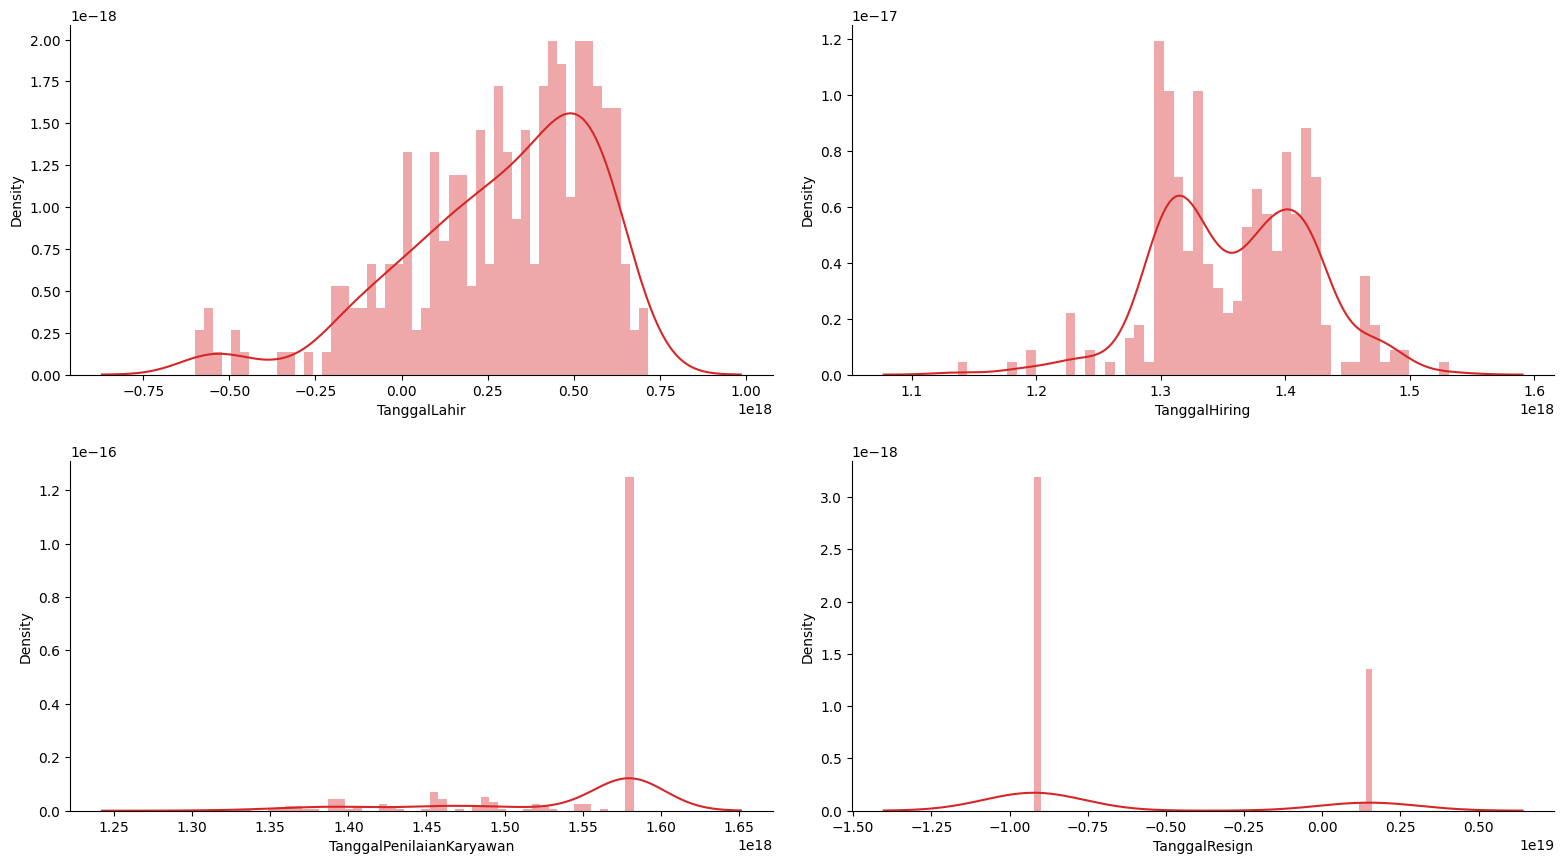

In [203]:
plt.figure(figsize=(16, 9))
for i in range(0, len(date_cols)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[date_cols[i]], bins=50, color='tab:red')
    sns.despine()
    plt.tight_layout(pad=2)

plt.show()

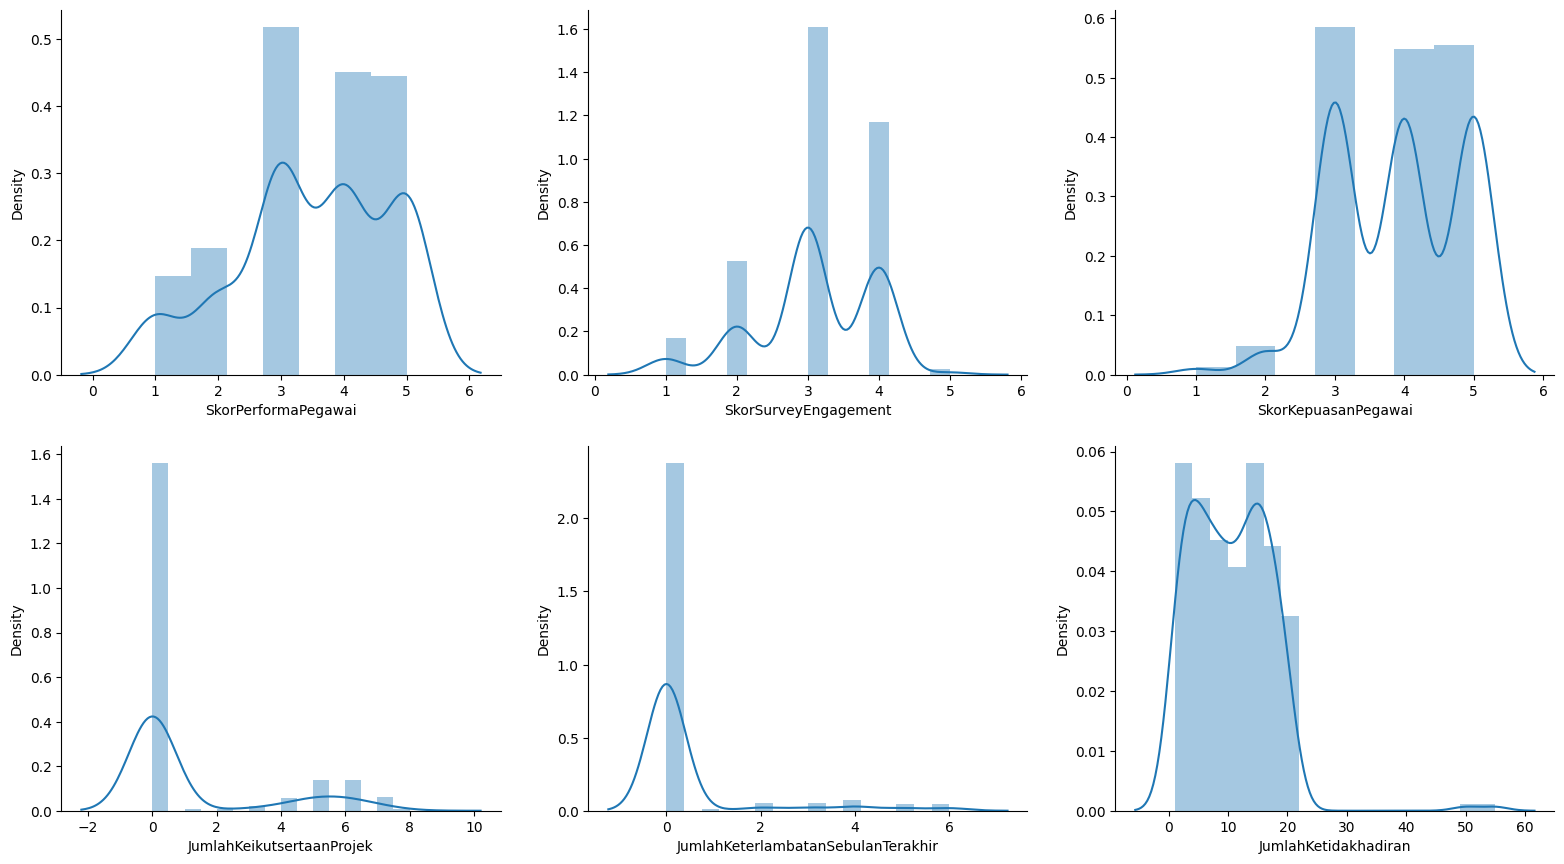

In [204]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[num_cols[i]], color='tab:blue')
    sns.despine()
    plt.tight_layout(pad=2)

plt.show()

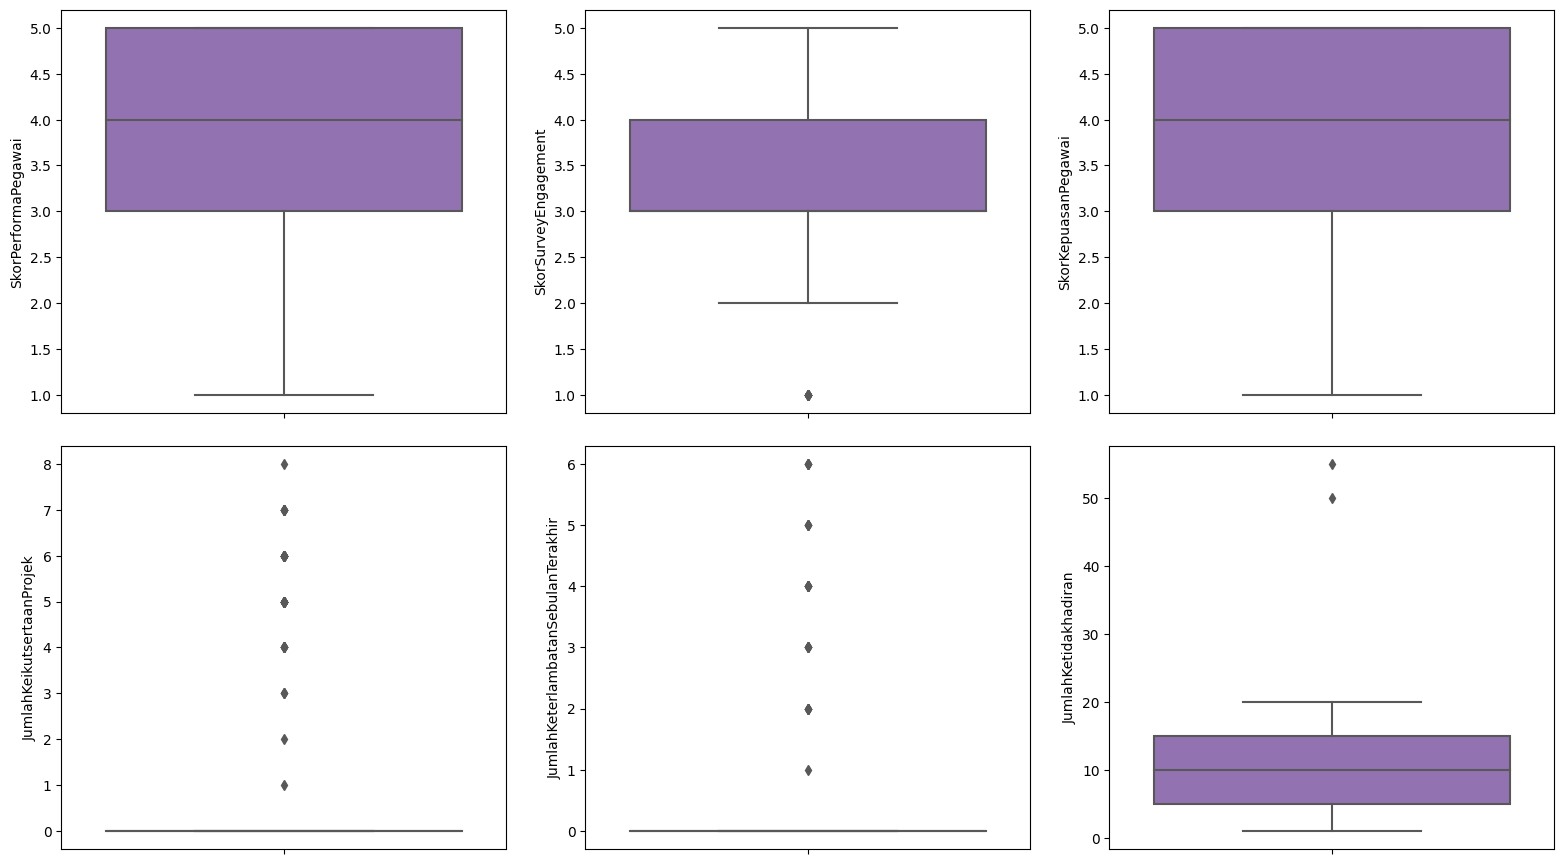

In [205]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[num_cols[i]], color='tab:purple')
    plt.tight_layout(pad=2)

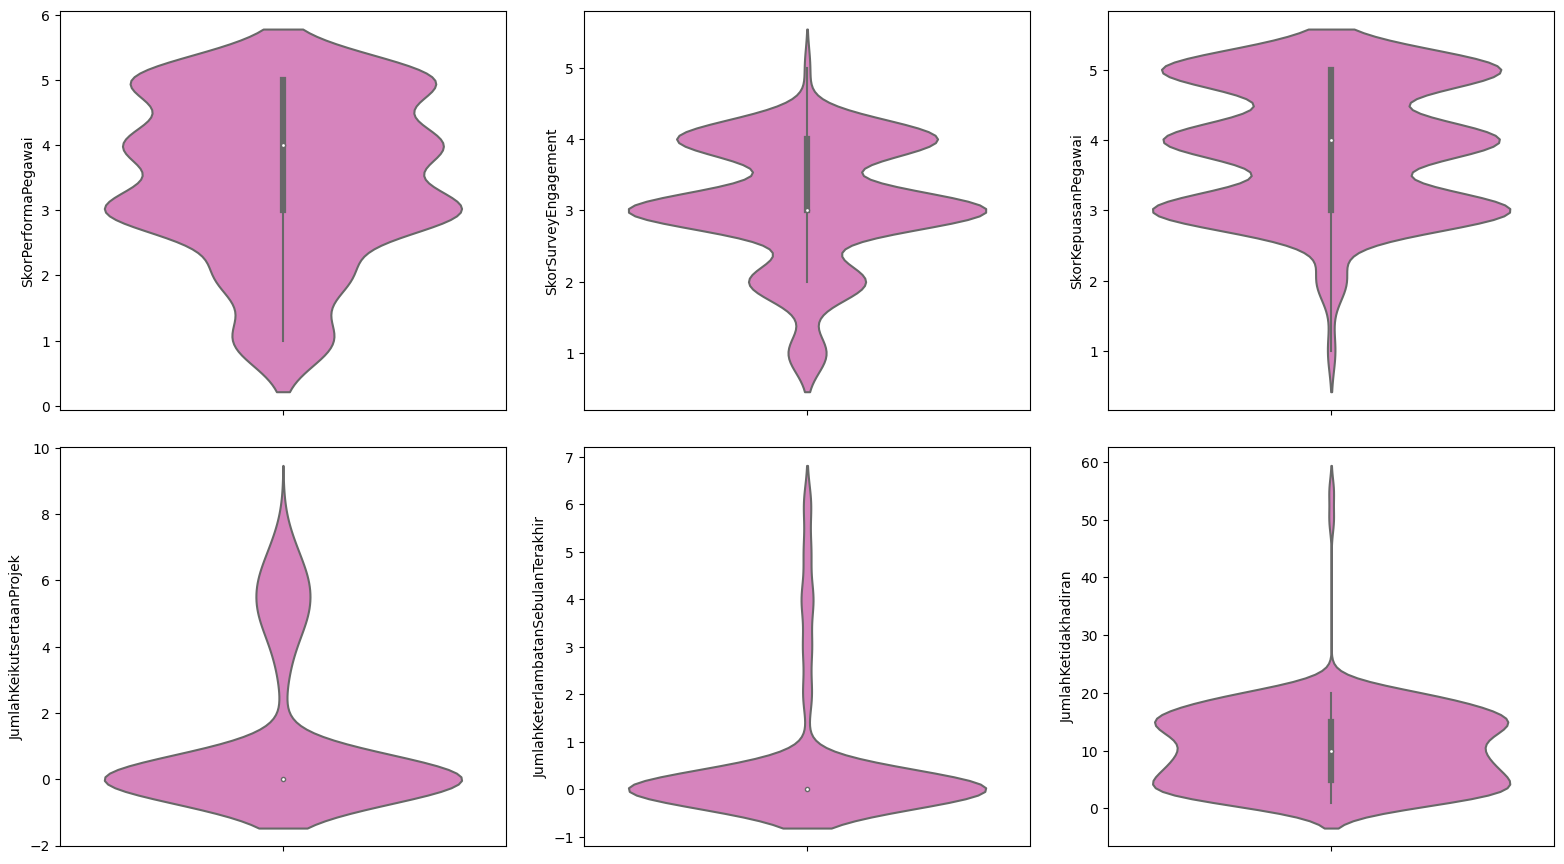

In [206]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols) - 1):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=df[num_cols[i]], color='tab:pink')
    plt.tight_layout(pad=2)

🔎 Insights
- Fitur `SkorSurveyEngagement` dan `JumlahKetidakhadiran` memiliki beberapa _outliers_, sehingga kita akan menganalisis lebih lanjut.

🔽 `SkorSurveyEngagement`

In [207]:
df['SkorSurveyEngagement'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [208]:
len(df[df['SkorSurveyEngagement'] < 2])

14

🔽 `JumlahKetidakhadiran`

In [209]:
df['JumlahKetidakhadiran'].unique()

array([ 9,  3, 11,  6, 10, 19,  4,  5,  2, 50, 12, 17, 15,  7, 13, 16, 14,
       20, 18,  1,  8, 55], dtype=int64)

In [210]:
len(df[df['JumlahKetidakhadiran'] > 20])

2

🔎 Observasi
- Fitur `JumlahKetidakhadiran` memiliki 2 data poin yang berupa _outlier_.

#### Categorical Features

In [211]:
cat.describe().T

,count,unique,top,freq
StatusPernikahan,287,3,Belum_menikah,183
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,10,Software Engineer,208
JenjangKarir,287,3,Freshgraduate_program,169
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
TingkatPendidikan,287,3,S1,176
AlasanResign,287,4,masih_bekerja,198


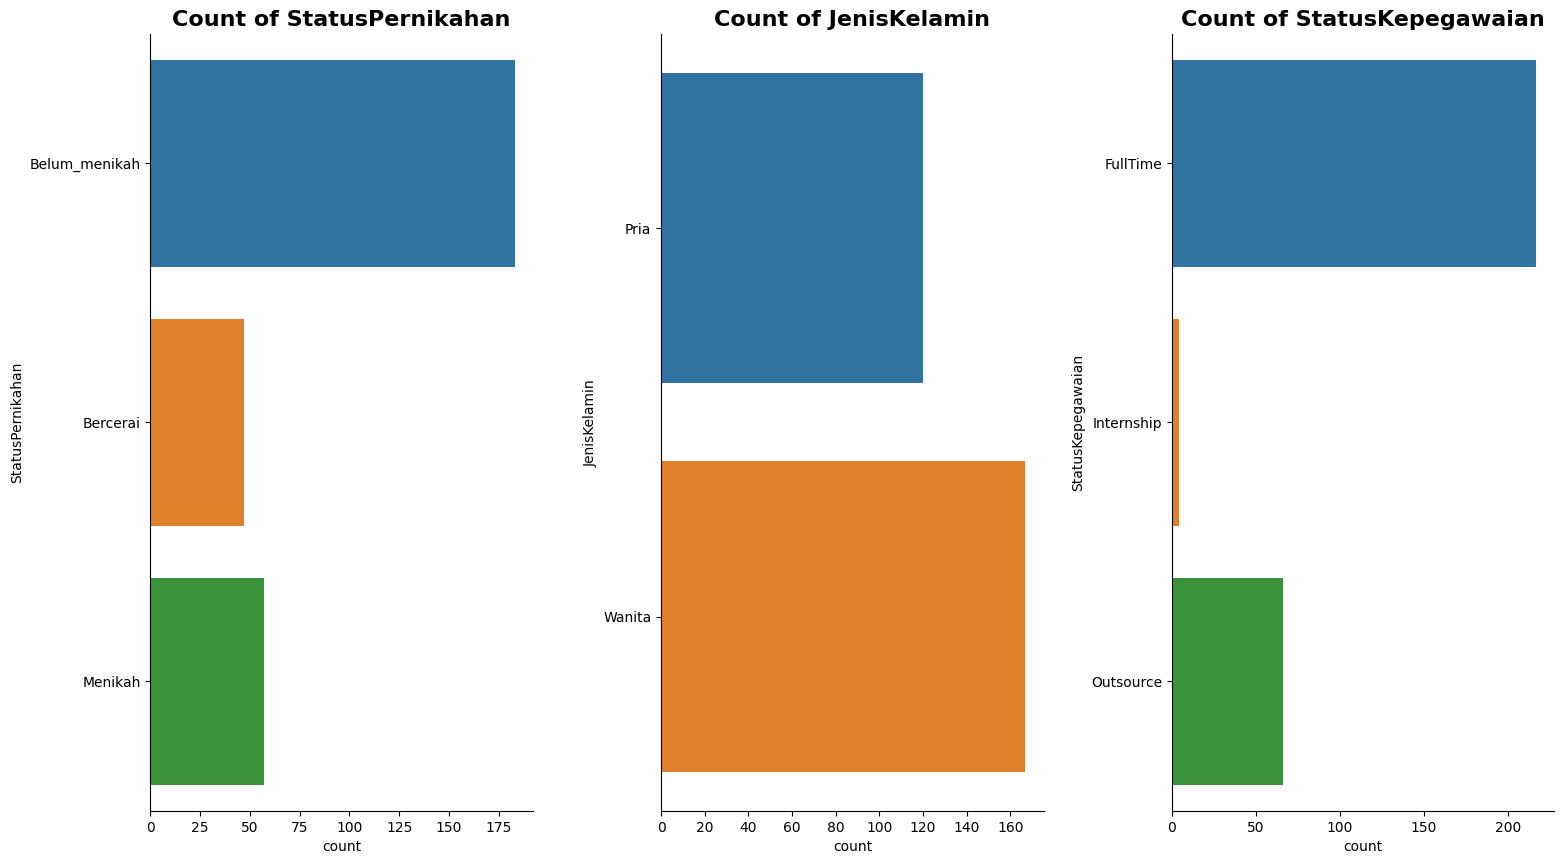

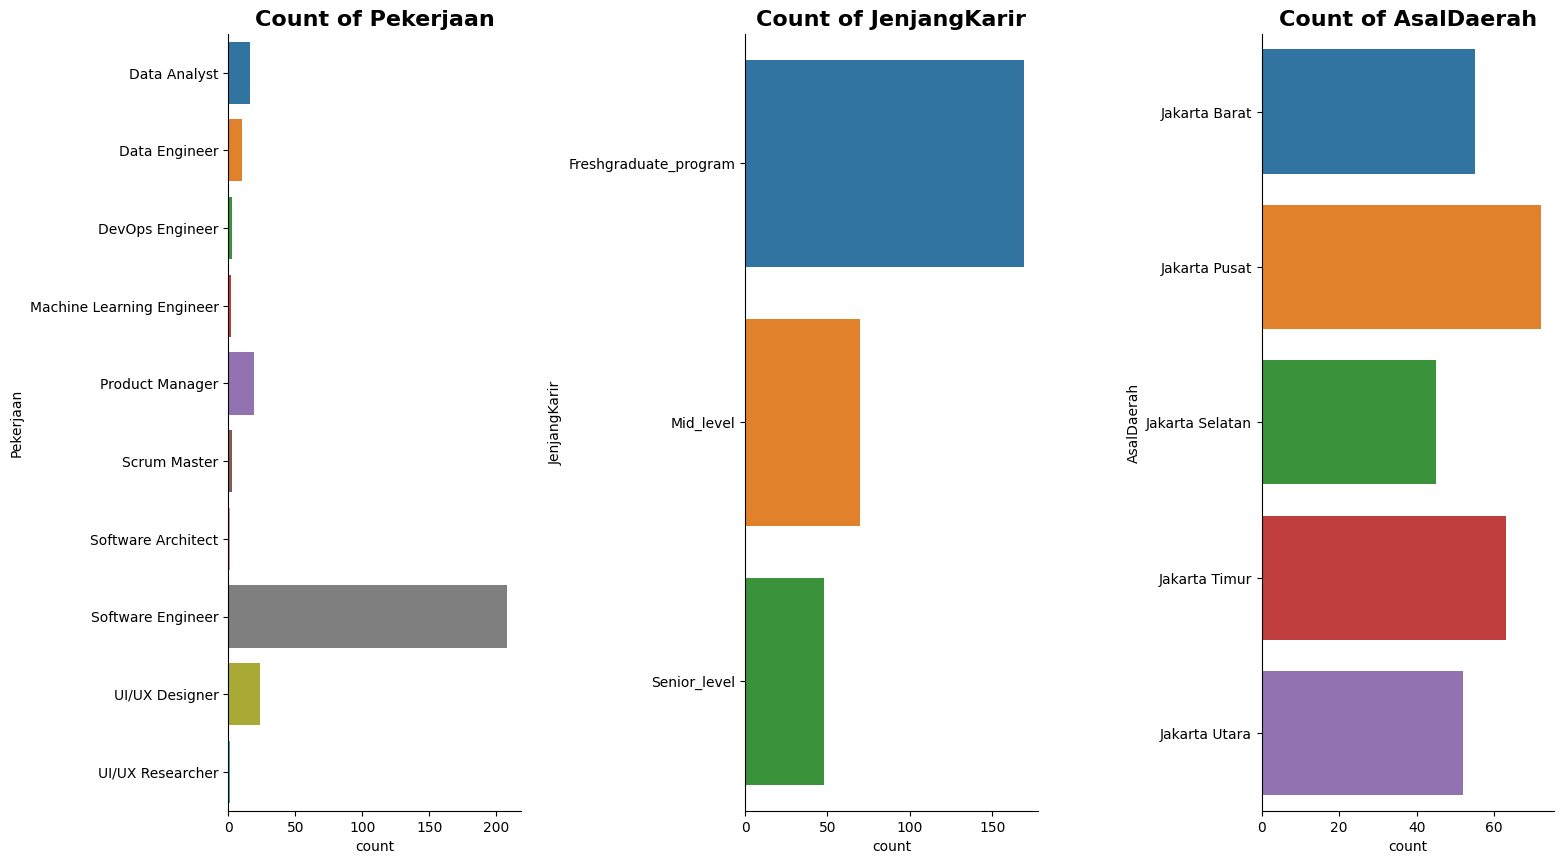

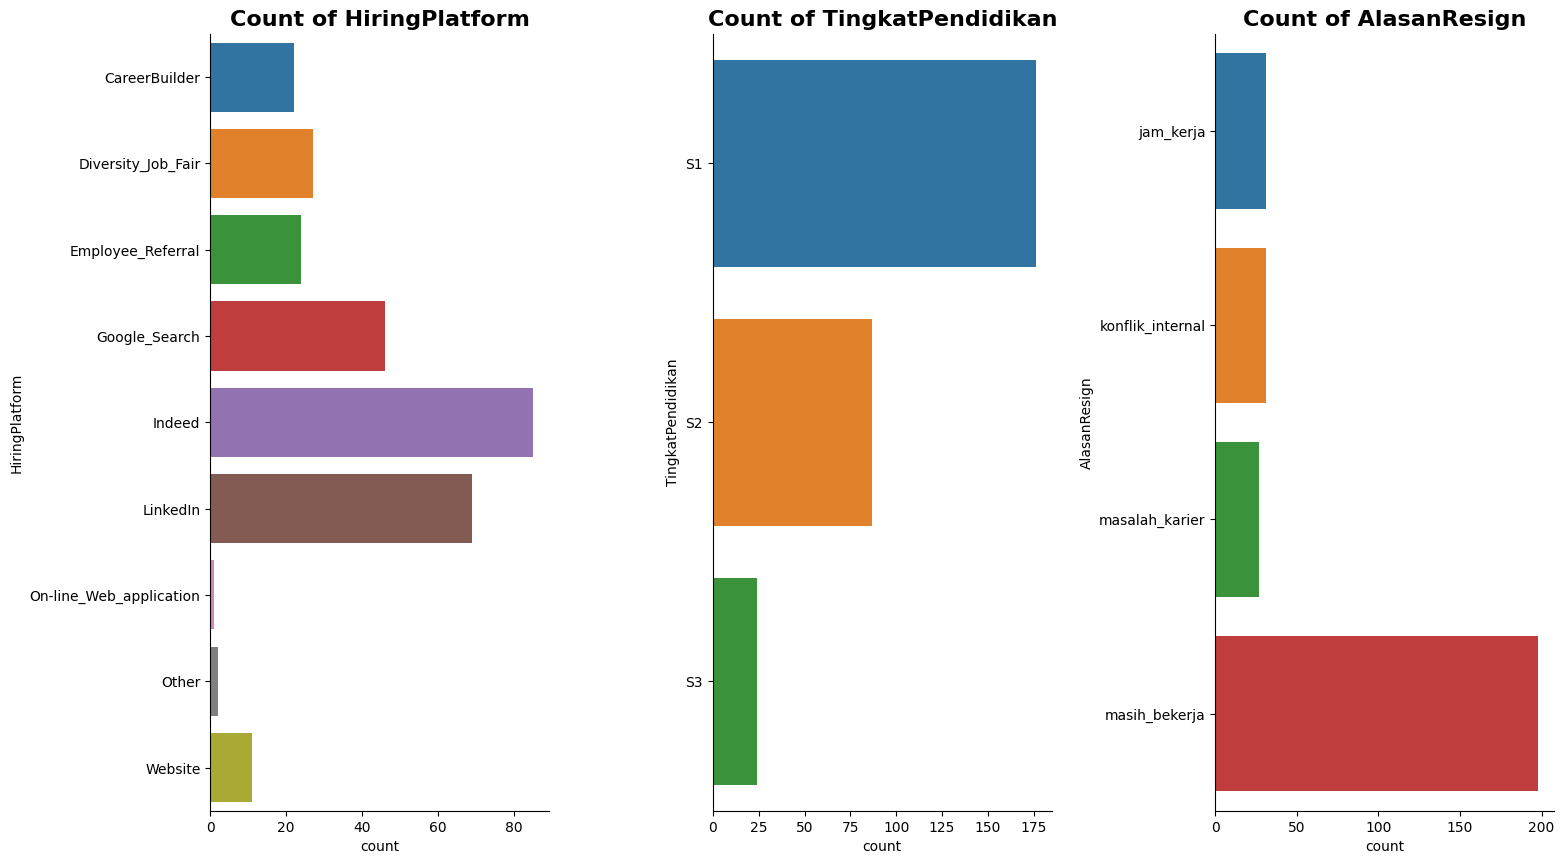

<Figure size 1600x900 with 0 Axes>

In [212]:
plt.figure(figsize=(16, 9))

# Subplot
for j in range(3):
    start_index = j * 3
    end_index = (j + 1) * 3
    for i in range(start_index, end_index):
        plt.subplot(1, 3, i % 3 + 1)
        ax = sns.countplot(y=df[cat_cols[i]], palette='tab10')
        plt.title(f'Count of {cat_cols[i]}', fontsize=16, weight='bold')
        sns.despine()
        plt.tight_layout(pad=2)

    plt.figure(figsize=(16, 9))

plt.show()

### Bivariate Analysis

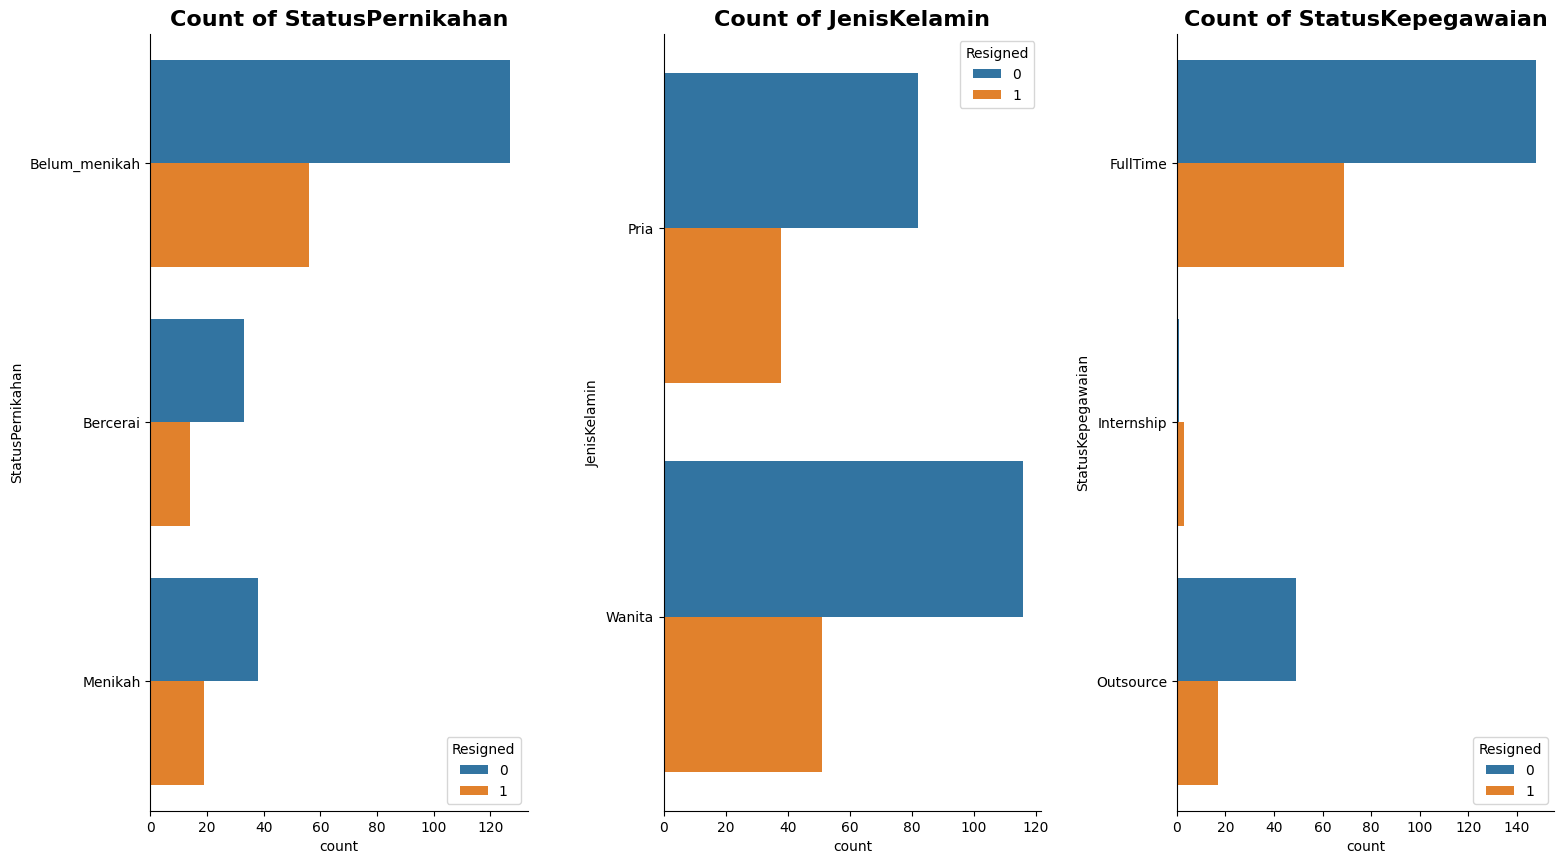

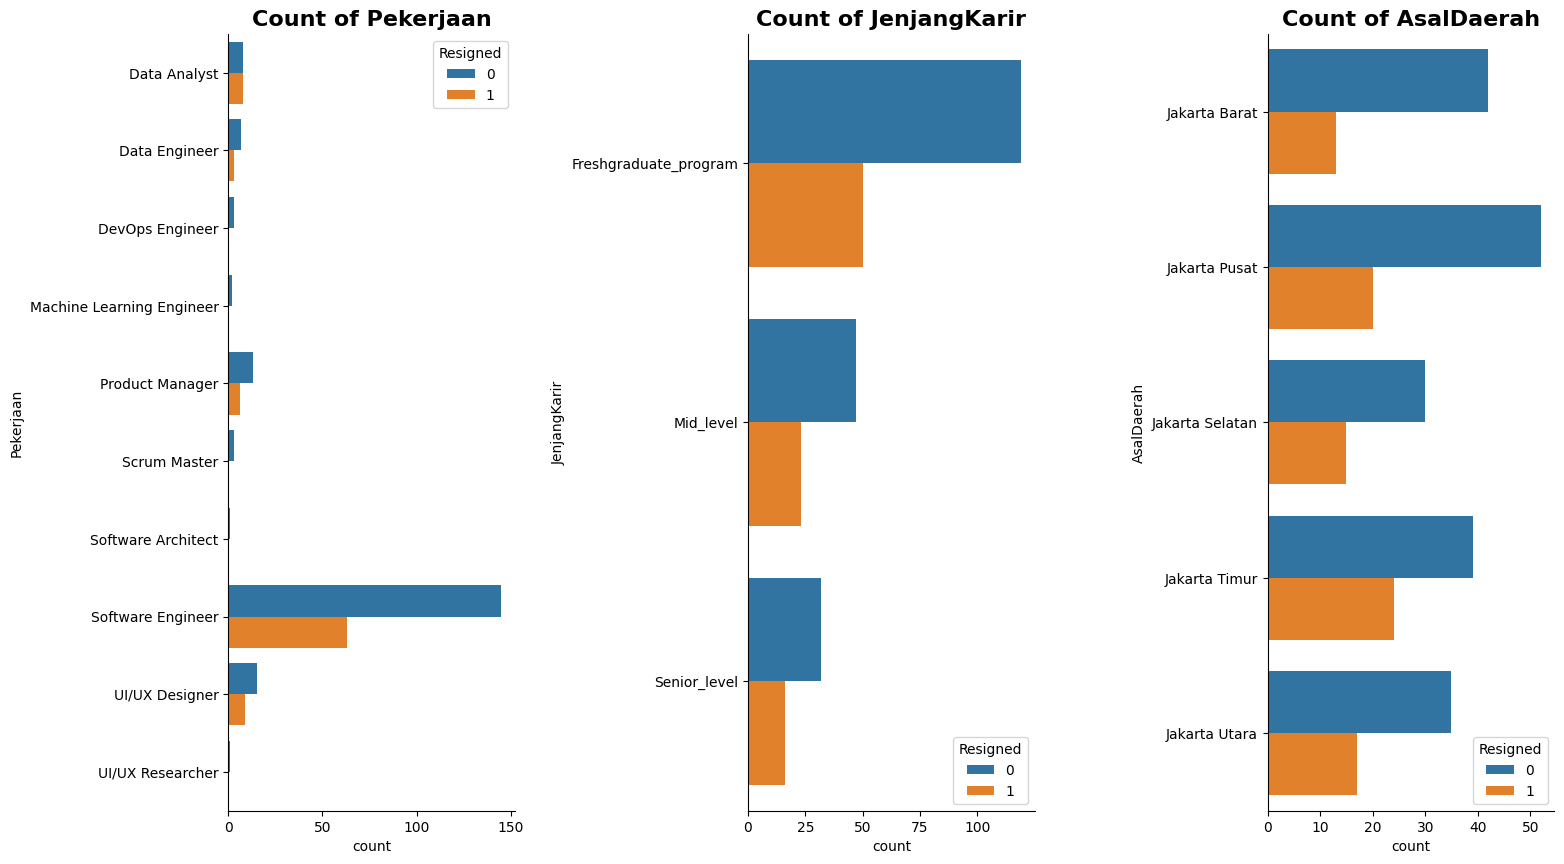

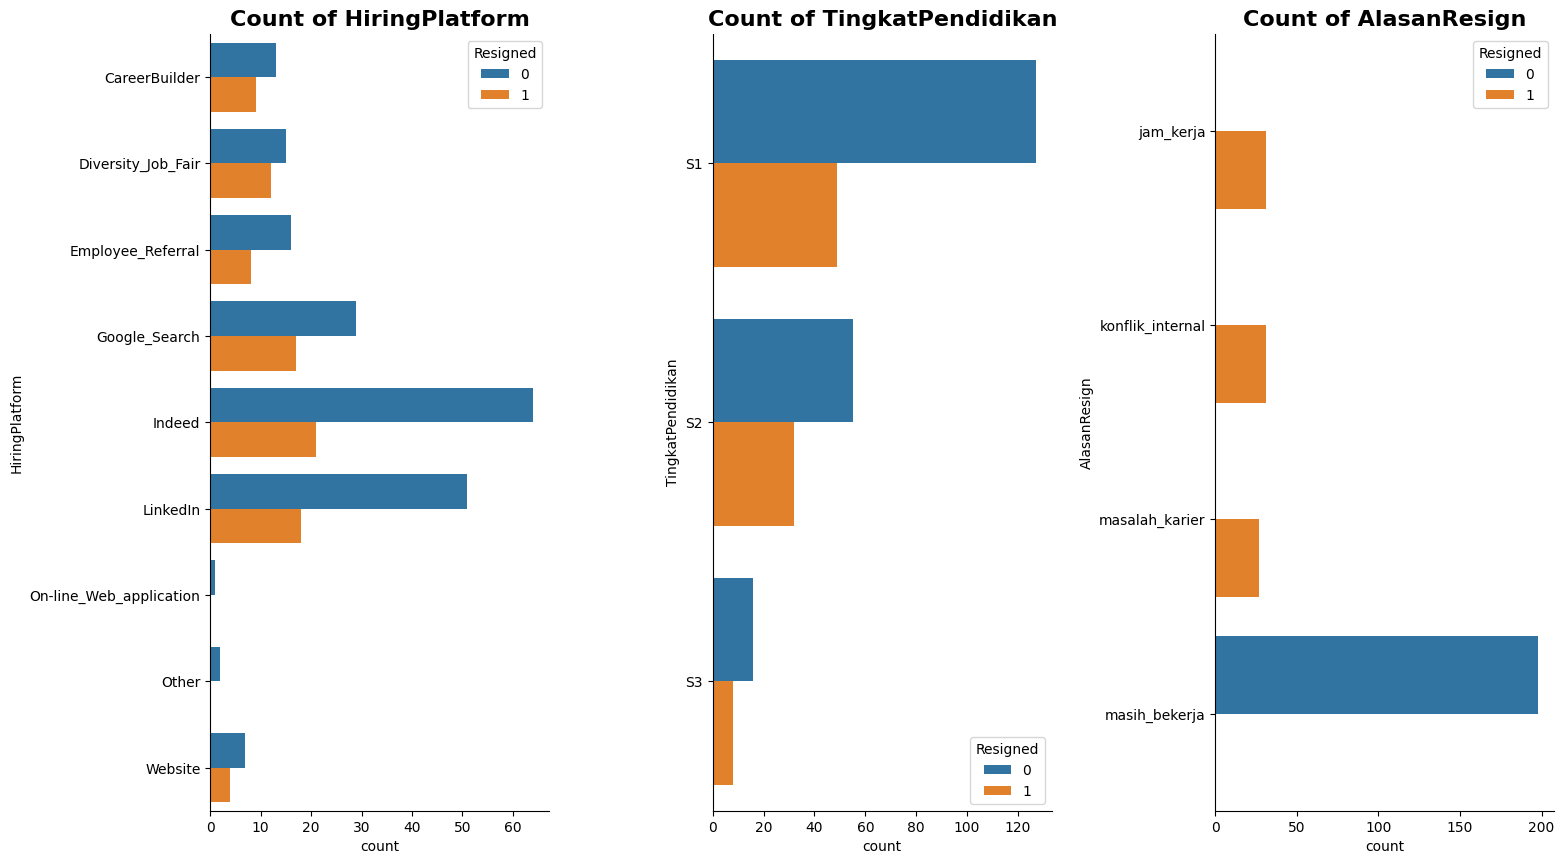

<Figure size 1600x900 with 0 Axes>

In [213]:
plt.figure(figsize=(16, 9))

# Subplot
for j in range(3):
    start_index = j * 3
    end_index = (j + 1) * 3
    for i in range(start_index, end_index):
        plt.subplot(1, 3, i % 3 + 1)
        ax = sns.countplot(data=df, y=df[cat_cols[i]], hue='Resigned', palette='tab10')
        plt.title(f'Count of {cat_cols[i]}', fontsize=16, weight='bold')
        sns.despine()
        plt.tight_layout(pad=2)

    plt.figure(figsize=(16, 9))

plt.show()

### Multivariate Analysis

<Figure size 1600x900 with 0 Axes>

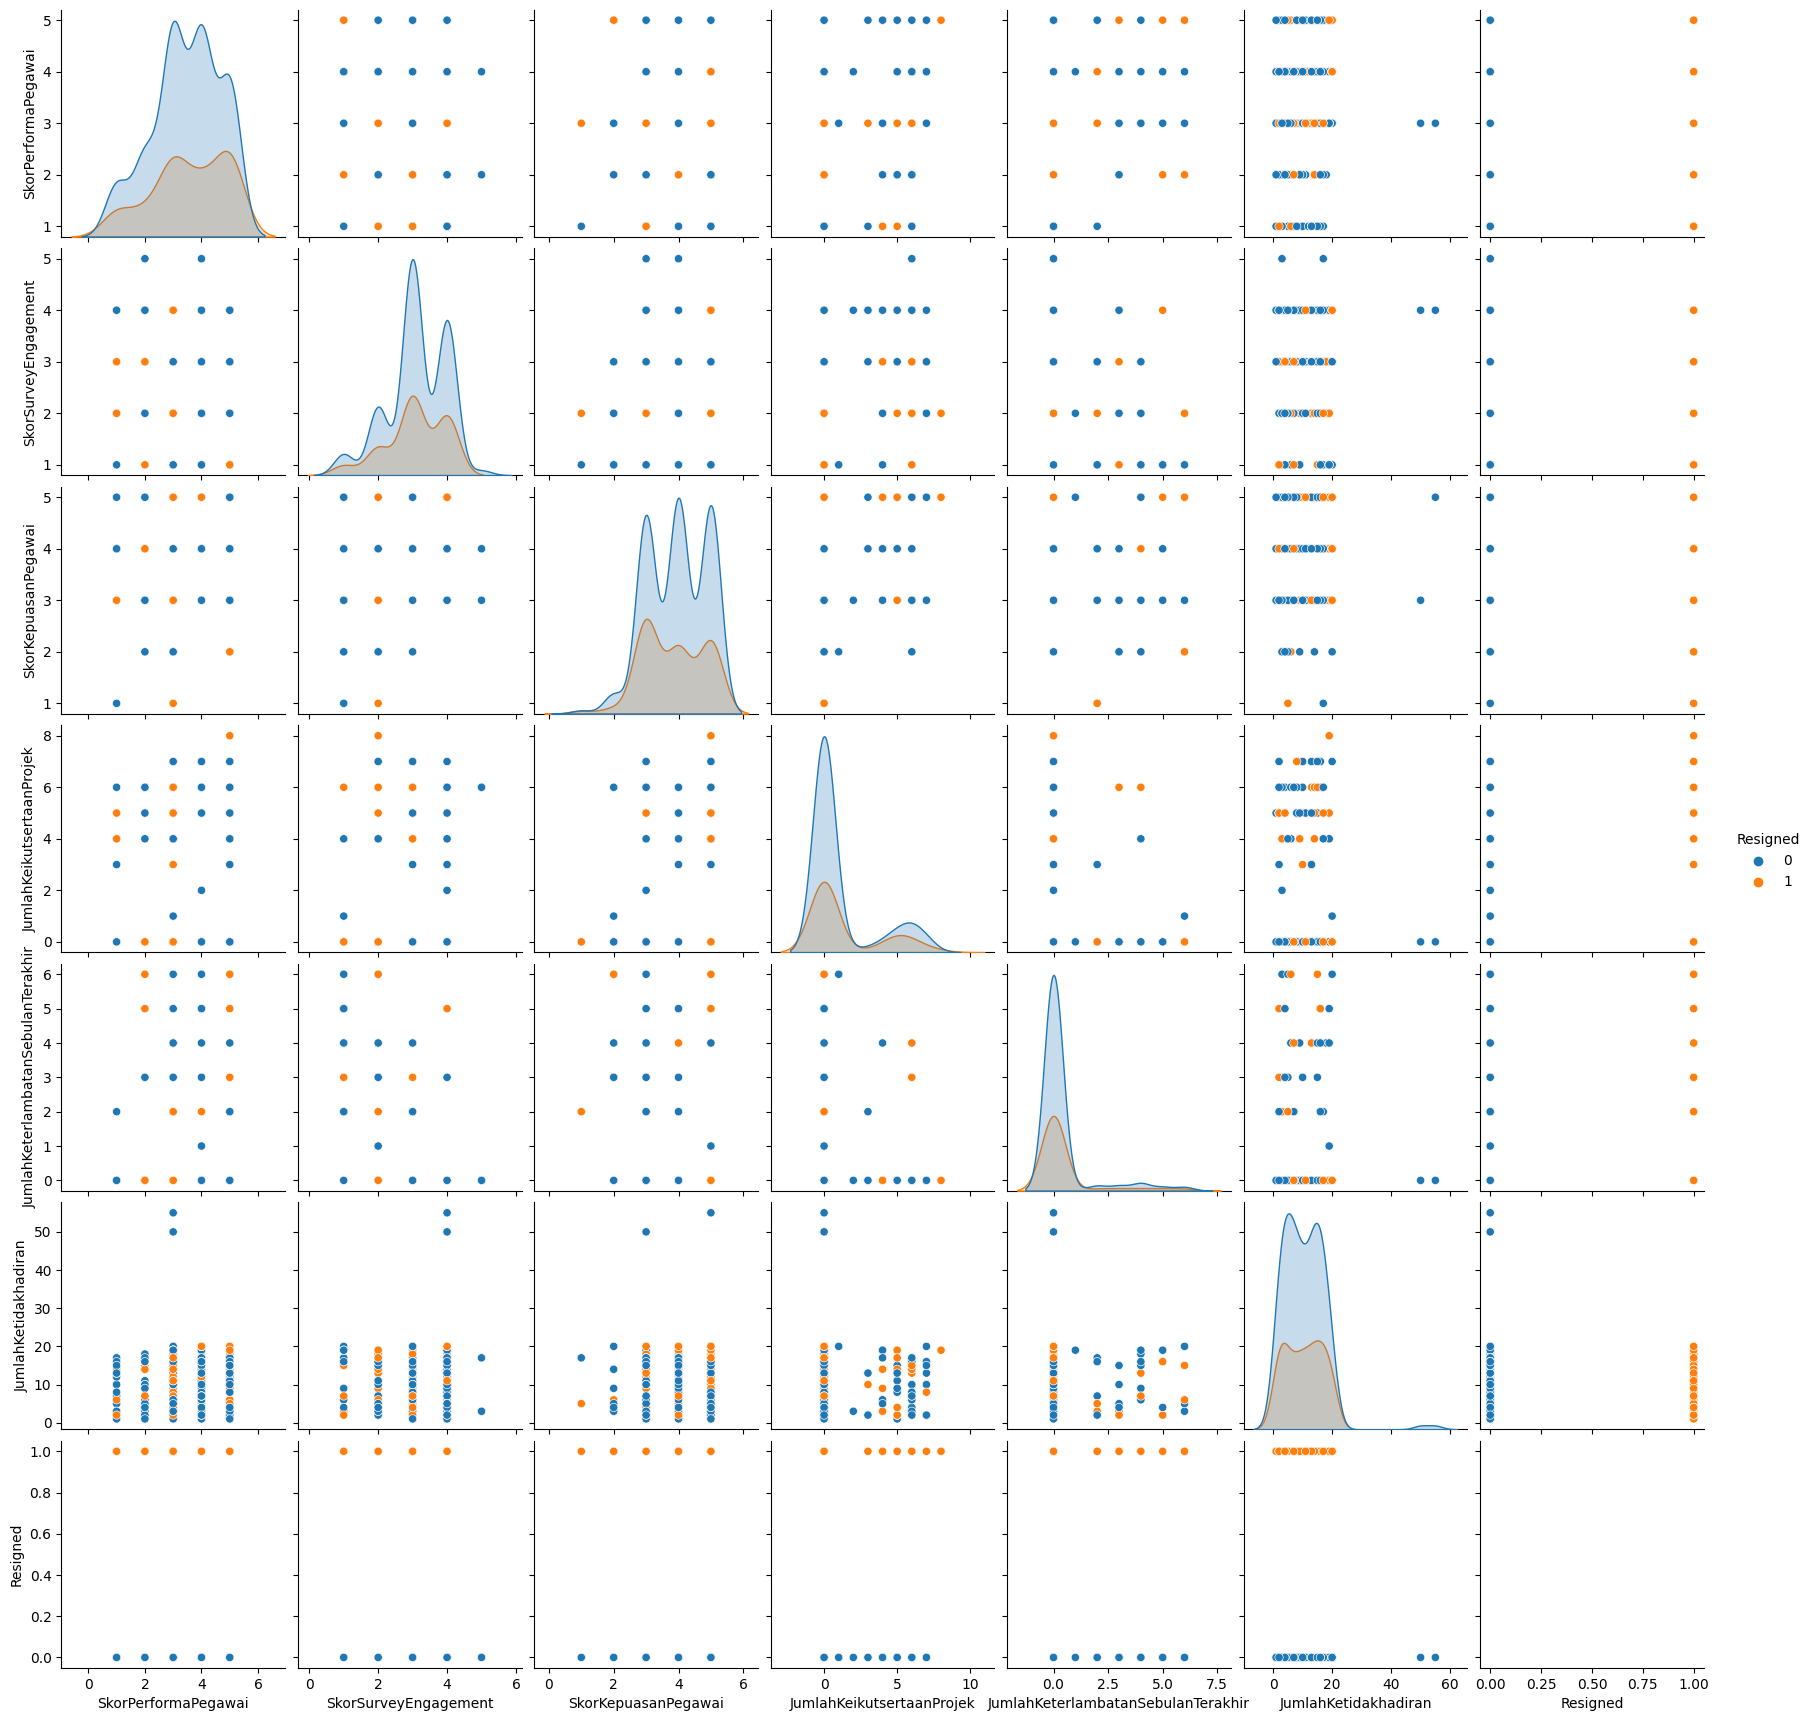

In [214]:
plt.figure(figsize=(16, 9))
sns.pairplot(data=df, vars=num.columns, hue='Resigned', palette='tab10')
plt.show()

### Correlation Matrix

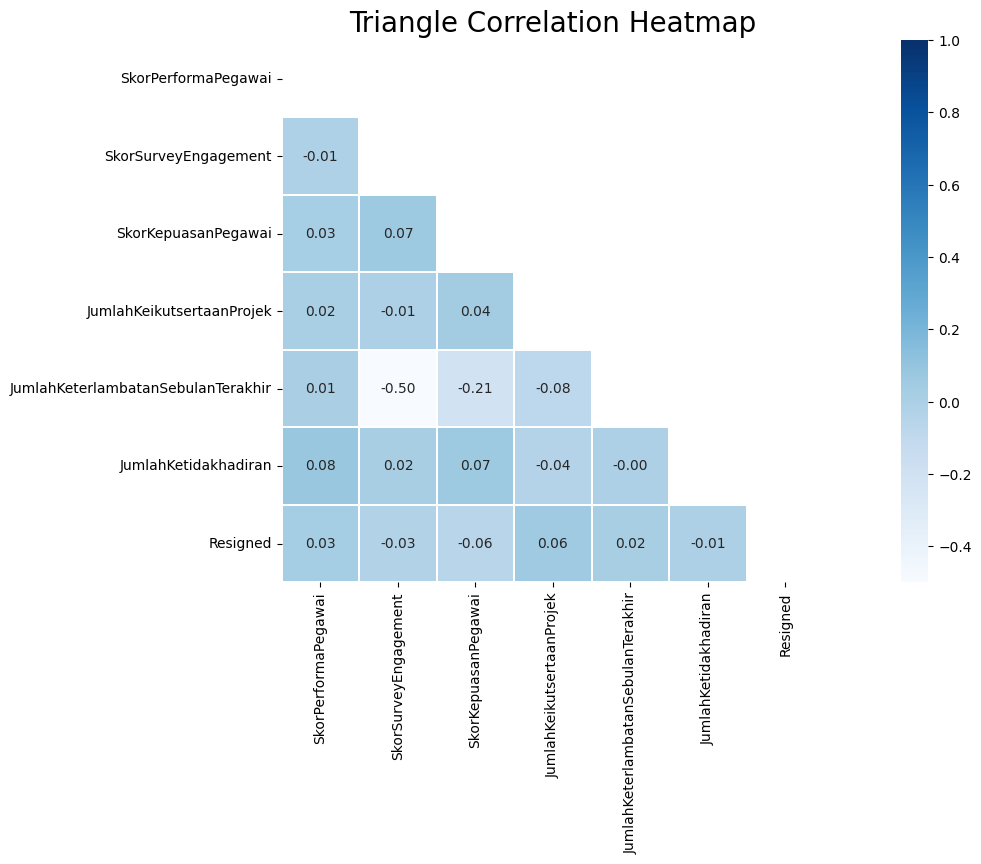

In [215]:
# Correlation plot
plt.figure(figsize=(16, 9))
corrmat = num.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask=mask, cmap='Blues', annot=True, fmt='.2f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={'fontsize':10})
plt.title('Triangle Correlation Heatmap', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

🔎 Insights
- Tidak ada _multicollinearity_. 

## Feature Engineering

In [216]:
df_eng = df.copy()

### Resign Reason Analysis

In [217]:
# Create new columns derived from existing columns
df_eng['TahunHiring'] = df_eng['TanggalHiring'].dt.year
df_eng['TahunHiring'] = df_eng['TahunHiring'].astype('Int64')

df_eng['TahunResign'] = df_eng['TanggalResign'].dt.year
df_eng['TahunResign'] = df_eng['TahunResign'].astype('Int64') # Prevent the occurrence of IntCastingNaNError

In [218]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    category      
 1   JenisKelamin                        287 non-null    category      
 2   StatusKepegawaian                   287 non-null    category      
 3   Pekerjaan                           287 non-null    category      
 4   JenjangKarir                        287 non-null    category      
 5   SkorPerformaPegawai                 287 non-null    int64         
 6   AsalDaerah                          287 non-null    category      
 7   HiringPlatform                      287 non-null    category      
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    int64         
 10  JumlahKeikutsertaanProjek 

In [219]:
annual_hiring = df_eng[['TahunHiring', 'TanggalHiring']].groupby('TahunHiring').agg({'TanggalHiring':'count'}).reset_index().rename(columns={'TahunHiring'   : 'Tahun',
                                                                                                                                             'TanggalHiring' : 'JumlahHiring'})
annual_hiring

,Tahun,JumlahHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [220]:
annual_resign = df_eng[['TahunResign', 'TanggalResign']].groupby('TahunResign').agg({'TanggalResign':'count'}).reset_index().rename(columns={'TahunResign'   : 'Tahun',
                                                                                                                                             'TanggalResign' : 'JumlahResign'})
annual_resign

,Tahun,JumlahResign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


🔽 `JumlahHiring` vs. `JumlahResign`

In [221]:
annual_turnover = annual_hiring.merge(annual_resign, how='outer', on='Tahun')
annual_turnover = annual_turnover.fillna(0).astype('int64')
annual_turnover

,Tahun,JumlahHiring,JumlahResign
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


In [222]:
annual_turnover['PerubahanKaryawan'] = annual_turnover['JumlahHiring'] - annual_turnover['JumlahResign']
     
total_karyawan = 0
list_jumlah_karyawan = []

for i in range(len(annual_turnover)):
    total_karyawan += annual_turnover['PerubahanKaryawan'][i]
    list_jumlah_karyawan.append(total_karyawan)

list_jumlah_karyawan

[1, 3, 5, 12, 20, 96, 137, 175, 219, 242, 248, 234, 209, 204, 198]

In [223]:
annual_turnover['TotalKaryawan'] = list_jumlah_karyawan
annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan
0,2006,1,0,1,1
1,2007,2,0,2,3
2,2008,2,0,2,5
3,2009,7,0,7,12
4,2010,8,0,8,20
5,2011,76,0,76,96
6,2012,41,0,41,137
7,2013,43,5,38,175
8,2014,56,12,44,219
9,2015,31,8,23,242


In [224]:
# Total Hiring
total_hiring = 0
list_total_hiring = []

for i in range(len(annual_turnover)):
    total_hiring += annual_turnover['JumlahHiring'][i]
    list_total_hiring.append(total_hiring)
    
annual_turnover['TotalHiring'] = list_total_hiring

# Total Resign
total_resign = 0
list_total_resign = []

for i in range(len(annual_turnover)):
    total_resign += annual_turnover['JumlahResign'][i]
    list_total_resign.append(total_resign)

annual_turnover['TotalResign'] = list_total_resign

annual_turnover

,Tahun,JumlahHiring,JumlahResign,PerubahanKaryawan,TotalKaryawan,TotalHiring,TotalResign
0,2006,1,0,1,1,1,0
1,2007,2,0,2,3,3,0
2,2008,2,0,2,5,5,0
3,2009,7,0,7,12,12,0
4,2010,8,0,8,20,20,0
5,2011,76,0,76,96,96,0
6,2012,41,0,41,137,137,0
7,2013,43,5,38,175,180,5
8,2014,56,12,44,219,236,17
9,2015,31,8,23,242,267,25


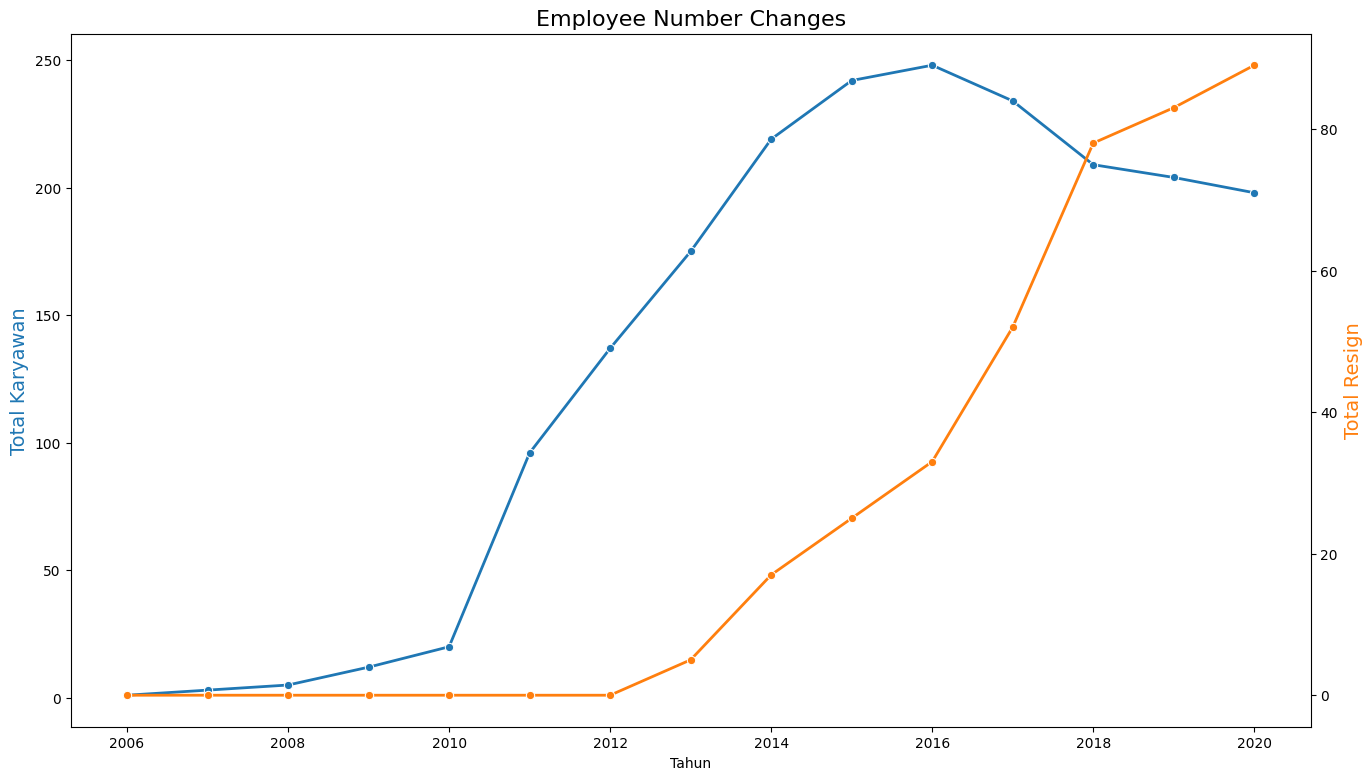

In [225]:
fig, ax1 = plt.subplots(figsize=(16, 9), frameon=True)
ax1.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

ax2 = ax1.twinx()
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalKaryawan', marker='o', linewidth=2, color='tab:blue', ax=ax1, zorder=10)
sns.lineplot(data=annual_turnover, x='Tahun', y='TotalResign', marker='o', linewidth=2, color='tab:orange', ax=ax2, zorder=10)

ax1.set_ylabel('Total Karyawan', color='tab:blue', fontsize=14)
# ax1.set_ylim(0, 300)
ax2.set_ylabel('Total Resign', color='tab:orange', fontsize=14)
# ax2.set_ylim(0, 100)

plt.title('Employee Number Changes', fontsize=16)
# plt.xlim(2006, 2020)
plt.show()

In [226]:
belum_resign = df_eng[df_eng['Resigned'] == 0]
sudah_resign = df_eng[df_eng['Resigned'] == 1]

In [227]:
karyawan_aktif = belum_resign.groupby(['Pekerjaan'])['Resigned'].count().to_frame().reset_index()
karyawan_aktif = karyawan_aktif.rename(columns={'Resigned': 'KaryawanAktif'})
karyawan_aktif

,Pekerjaan,KaryawanAktif
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Machine Learning Engineer,2
4,Product Manager,13
5,Scrum Master,3
6,Software Architect,1
7,Software Engineer,145
8,UI/UX Designer,15
9,UI/UX Researcher,1


In [228]:
karyawan_resign = sudah_resign.groupby(['Pekerjaan'])['Resigned'].count().to_frame().reset_index()
karyawan_resign = karyawan_resign.rename(columns={'Resigned': 'KaryawanResign'})
karyawan_resign

,Pekerjaan,KaryawanResign
0,Data Analyst,8
1,Data Engineer,3
2,DevOps Engineer,0
3,Machine Learning Engineer,0
4,Product Manager,6
5,Scrum Master,0
6,Software Architect,0
7,Software Engineer,63
8,UI/UX Designer,9
9,UI/UX Researcher,0


🔽 `KaryawanAktif` vs. `KaryawanResign`

In [229]:
pekerjaan = karyawan_aktif.merge(karyawan_resign, how='outer', on='Pekerjaan')
pekerjaan

,Pekerjaan,KaryawanAktif,KaryawanResign
0,Data Analyst,8,8
1,Data Engineer,7,3
2,DevOps Engineer,3,0
3,Machine Learning Engineer,2,0
4,Product Manager,13,6
5,Scrum Master,3,0
6,Software Architect,1,0
7,Software Engineer,145,63
8,UI/UX Designer,15,9
9,UI/UX Researcher,1,0


In [230]:
pekerjaan['JumlahKaryawan'] = pekerjaan['KaryawanAktif'] + pekerjaan['KaryawanResign']
pekerjaan

,Pekerjaan,KaryawanAktif,KaryawanResign,JumlahKaryawan
0,Data Analyst,8,8,16
1,Data Engineer,7,3,10
2,DevOps Engineer,3,0,3
3,Machine Learning Engineer,2,0,2
4,Product Manager,13,6,19
5,Scrum Master,3,0,3
6,Software Architect,1,0,1
7,Software Engineer,145,63,208
8,UI/UX Designer,15,9,24
9,UI/UX Researcher,1,0,1


In [231]:
pekerjaan['PersentaseAktif'] = round((pekerjaan['KaryawanAktif'] / pekerjaan['JumlahKaryawan']) * 100, 1)
pekerjaan = pekerjaan.sort_values(by='PersentaseAktif', ascending=True)
pekerjaan

,Pekerjaan,KaryawanAktif,KaryawanResign,JumlahKaryawan,PersentaseAktif
0,Data Analyst,8,8,16,50.00
8,UI/UX Designer,15,9,24,62.50
4,Product Manager,13,6,19,68.40
7,Software Engineer,145,63,208,69.70
1,Data Engineer,7,3,10,70.00
2,DevOps Engineer,3,0,3,100.00
3,Machine Learning Engineer,2,0,2,100.00
5,Scrum Master,3,0,3,100.00
6,Software Architect,1,0,1,100.00
9,UI/UX Researcher,1,0,1,100.00


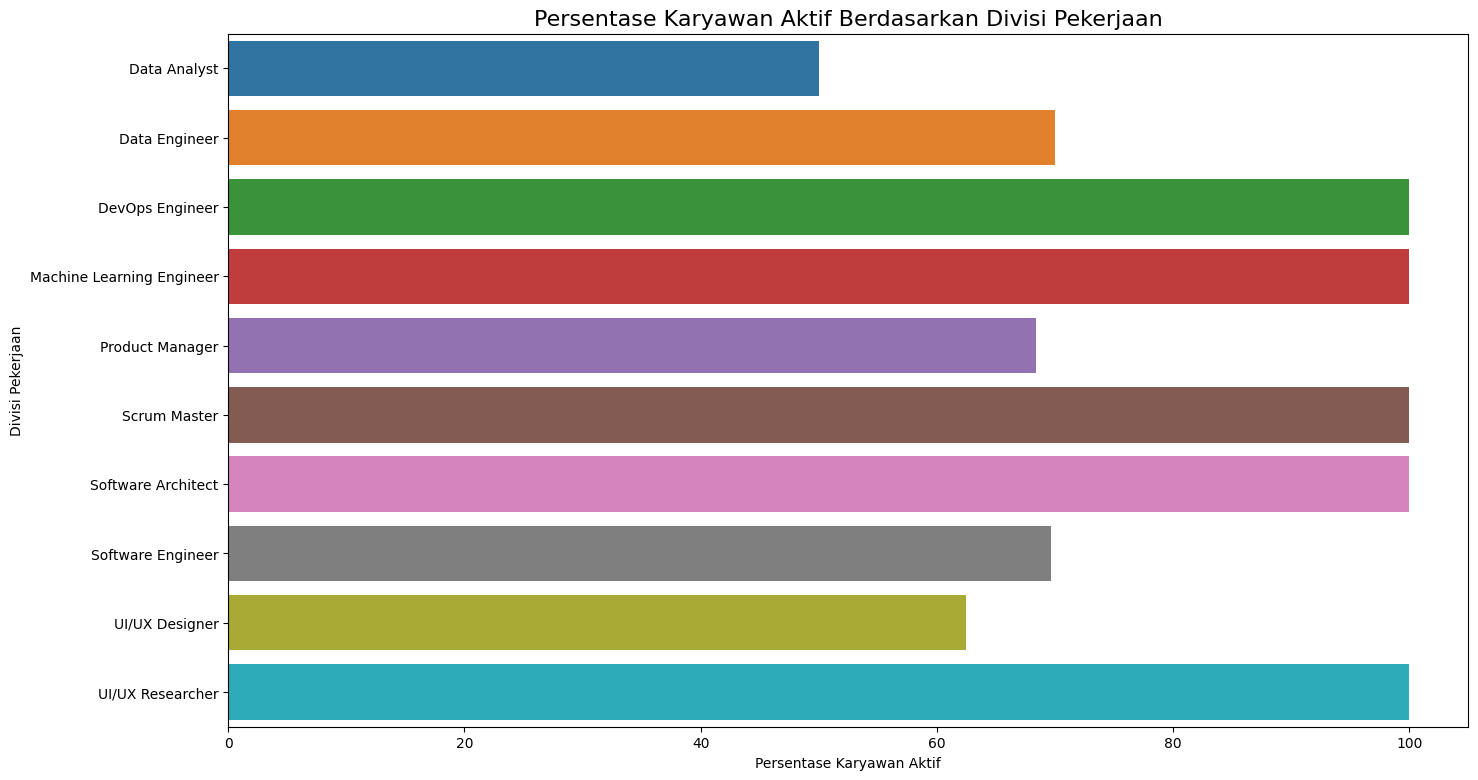

In [232]:
plt.figure(figsize=(16, 9))
sns.barplot(data=pekerjaan, x='PersentaseAktif', y='Pekerjaan', palette='tab10')
plt.title('Persentase Karyawan Aktif Berdasarkan Divisi Pekerjaan', fontsize=16)

plt.xlabel('Persentase Karyawan Aktif')
plt.ylabel('Divisi Pekerjaan')

plt.show()

🔽 `PersentaseAktif` vs. `PersentaseResign`

In [233]:
pekerjaan['PersentaseResign'] = round((pekerjaan['KaryawanResign'] / pekerjaan['JumlahKaryawan']) * 100, 1)
pekerjaan = pekerjaan.sort_values(by='PersentaseResign', ascending=False)
pekerjaan

,Pekerjaan,KaryawanAktif,KaryawanResign,JumlahKaryawan,PersentaseAktif,PersentaseResign
0,Data Analyst,8,8,16,50.00,50.00
8,UI/UX Designer,15,9,24,62.50,37.50
4,Product Manager,13,6,19,68.40,31.60
7,Software Engineer,145,63,208,69.70,30.30
1,Data Engineer,7,3,10,70.00,30.00
2,DevOps Engineer,3,0,3,100.00,0.00
3,Machine Learning Engineer,2,0,2,100.00,0.00
5,Scrum Master,3,0,3,100.00,0.00
6,Software Architect,1,0,1,100.00,0.00
9,UI/UX Researcher,1,0,1,100.00,0.00


In [234]:
pekerjaan['Pekerjaan'][pekerjaan['PersentaseAktif'] == 100].values

['DevOps Engineer', 'Machine Learning Engineer', 'Scrum Master', 'Software Architect', 'UI/UX Researcher']
Categories (10, object): ['Data Analyst', 'Data Engineer', 'DevOps Engineer', 'Machine Learning Engineer', ..., 'Software Architect', 'Software Engineer', 'UI/UX Designer', 'UI/UX Researcher']

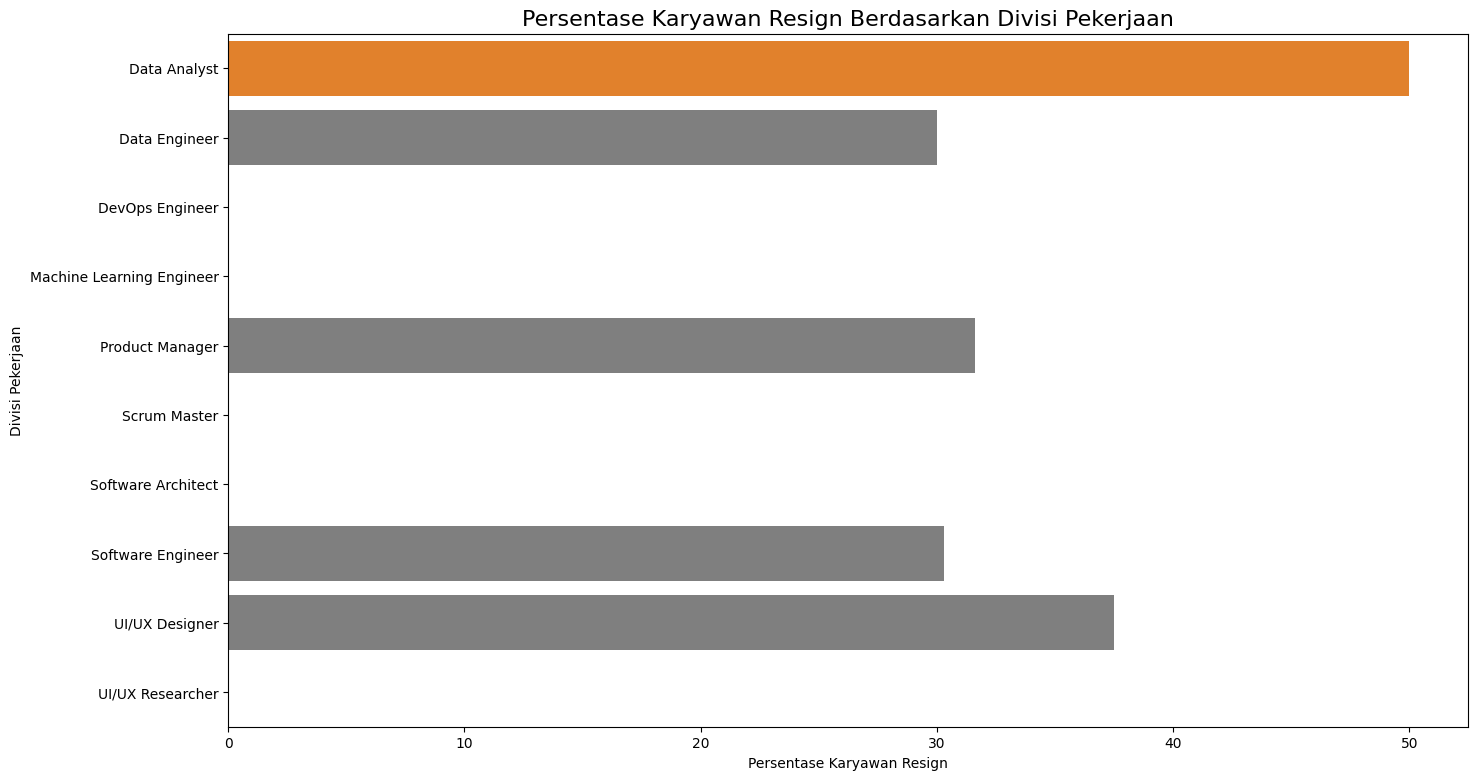

In [235]:
plt.figure(figsize=(16, 9))
colors = ['tab:orange'] + ['tab:gray'] * (len(pekerjaan) - 1)
sns.barplot(data=pekerjaan, x='PersentaseResign', y='Pekerjaan', palette=colors)
plt.title('Persentase Karyawan Resign Berdasarkan Divisi Pekerjaan', fontsize=16)
plt.xlabel('Persentase Karyawan Resign')
plt.ylabel('Divisi Pekerjaan')
plt.show()

🔎 Insights
- Berdasarkan hasil analisis karyawan yang _resign_, pekerjaan dengan persentase resign tertinggi adalah **Data Analyst**. Namun, jika dilihat dari jumlah karyawan yang _resign_, pekerjaan dengan jumlah resign terbanyak adalah **Software Engineer**.

🔽 `Data Analyst`

In [236]:
da_resign_data = df_eng[(df_eng['Resigned'] == 1) & (df_eng['Pekerjaan'] == 'Data Analyst')]
da_resign_data.describe(include='all')

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,SkorPerformaPegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
count,8,8,8,8,8,8.00,8,8,8.00,8.00,8.00,8.00,8.00,8,8,8,8,8,8,8.00,8.00,8.00
unique,3,2,2,1,1,NaN,4,5,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
top,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,NaN,Jakarta Utara,CareerBuilder,NaN,NaN,NaN,NaN,NaN,S1,konflik_internal,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
freq,5,6,5,8,8,NaN,3,2,NaN,NaN,NaN,NaN,NaN,6,8,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
mean,NaN,NaN,NaN,NaN,NaN,3.88,NaN,NaN,3.62,3.75,1.38,0.00,9.75,NaN,NaN,1981-01-03 15:00:00,2013-01-26 03:00:00,2018-07-28 21:00:00,2016-09-29 00:00:00,1.00,2012.75,2016.25
min,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,3.00,3.00,0.00,0.00,2.00,NaN,NaN,1968-05-30 00:00:00,2009-07-06 00:00:00,2014-02-20 00:00:00,2014-08-19 00:00:00,1.00,2009.00,2014.00
25%,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,3.00,3.00,0.00,0.00,2.75,NaN,NaN,1975-01-27 06:00:00,2012-01-26 12:00:00,2017-02-04 00:00:00,2015-03-24 12:00:00,1.00,2011.75,2014.75
50%,NaN,NaN,NaN,NaN,NaN,4.50,NaN,NaN,4.00,4.00,0.00,0.00,7.00,NaN,NaN,1984-05-02 12:00:00,2012-08-20 00:00:00,2020-01-12 12:00:00,2017-05-05 00:00:00,1.00,2012.50,2017.00
75%,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,4.00,4.00,1.00,0.00,17.75,NaN,NaN,1987-02-15 12:00:00,2014-04-28 00:00:00,2020-01-22 00:00:00,2017-11-18 06:00:00,1.00,2014.25,2017.25
max,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,4.00,5.00,7.00,0.00,20.00,NaN,NaN,1989-09-08 00:00:00,2016-10-02 00:00:00,2020-01-30 00:00:00,2018-06-16 00:00:00,1.00,2016.00,2018.00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'jam_kerja'),
  Text(1, 0, 'konflik_internal'),
  Text(2, 0, 'masalah_karier'),
  Text(3, 0, 'masih_bekerja')])

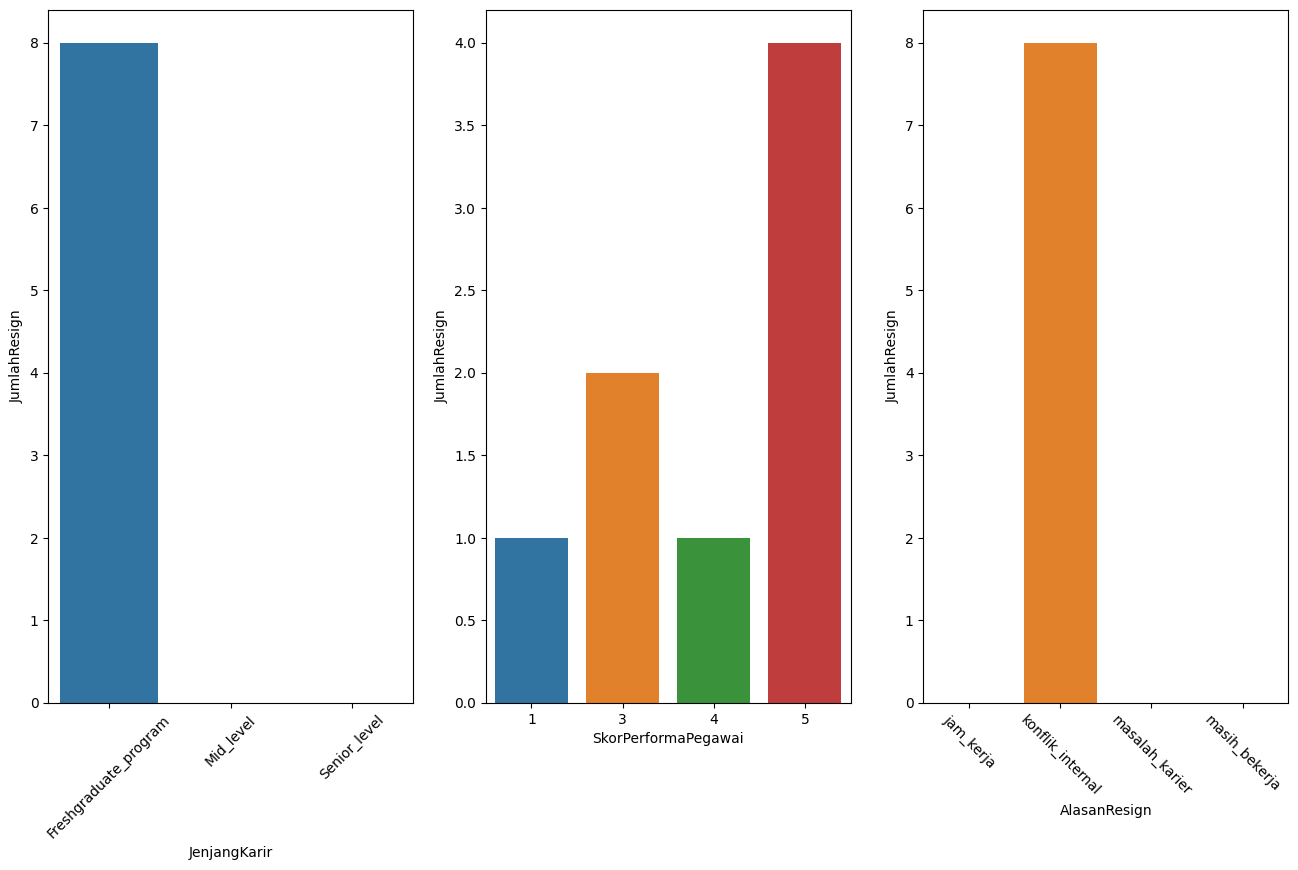

In [237]:
jenjang_karir_da = da_resign_data[['JenjangKarir', 'Resigned']].groupby('JenjangKarir').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
skor_performa_da = da_resign_data[['SkorPerformaPegawai', 'Resigned']].groupby('SkorPerformaPegawai').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
alasan_resign_da = da_resign_data[['AlasanResign', 'Resigned']].groupby('AlasanResign').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
     
plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 1)
sns.barplot (data=jenjang_karir_da, x='JenjangKarir', y='JumlahResign')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot (data=skor_performa_da, x='SkorPerformaPegawai', y='JumlahResign')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.barplot (data=alasan_resign_da, x='AlasanResign', y='JumlahResign')
plt.xticks(rotation=-45)

🔎 Insights
- Semua karyawan yang _resign_ adalah _fresh graduate_ dengan alasan konflik internal.
- 4 di antara mereka memiliki `SkorPerformaPegawai` 5 atau sangat bagus.

🔽 `Software Engineer`

In [238]:
se_resign_data = df_eng[(df_eng['Resigned'] == 1) & (df_eng['Pekerjaan'] == 'Software Engineer')]
se_resign_data.describe(include='all')

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,SkorPerformaPegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
count,63,63,63,63,63,63.00,63,63,63.00,63.00,63.00,63.00,63.00,63,63,63,63,63,63,63.00,63.00,63.00
unique,3,2,3,1,3,NaN,5,7,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
top,Belum_menikah,Wanita,FullTime,Software Engineer,Freshgraduate_program,NaN,Jakarta Timur,Indeed,NaN,NaN,NaN,NaN,NaN,S1,jam_kerja,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
freq,39,33,51,63,29,NaN,16,17,NaN,NaN,NaN,NaN,NaN,32,24,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
mean,NaN,NaN,NaN,NaN,NaN,3.54,NaN,NaN,3.02,3.95,1.49,0.44,10.21,NaN,NaN,1980-05-01 10:17:08.571428544,2013-04-01 09:31:25.714285824,2018-09-10 04:11:25.714285824,2017-02-24 05:42:51.428571392,1.00,2012.83,2016.65
min,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,0.00,0.00,1.00,NaN,NaN,1951-02-25 00:00:00,2007-11-05 00:00:00,2014-01-10 00:00:00,2013-05-30 00:00:00,1.00,2007.00,2013.00
25%,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,3.00,3.00,0.00,0.00,5.00,NaN,NaN,1972-11-15 00:00:00,2011-07-28 12:00:00,2017-01-25 12:00:00,2015-02-19 00:00:00,1.00,2011.00,2015.00
50%,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,3.00,4.00,0.00,0.00,10.00,NaN,NaN,1983-08-27 00:00:00,2013-04-01 00:00:00,2020-01-15 00:00:00,2017-11-15 00:00:00,1.00,2013.00,2017.00
75%,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,4.00,5.00,4.50,0.00,15.00,NaN,NaN,1987-10-10 12:00:00,2014-10-20 00:00:00,2020-02-01 00:00:00,2018-06-08 00:00:00,1.00,2014.00,2018.00
max,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,4.00,5.00,8.00,6.00,20.00,NaN,NaN,1991-09-05 00:00:00,2017-04-20 00:00:00,2020-02-27 00:00:00,2020-09-27 00:00:00,1.00,2017.00,2020.00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'jam_kerja'),
  Text(1, 0, 'konflik_internal'),
  Text(2, 0, 'masalah_karier'),
  Text(3, 0, 'masih_bekerja')])

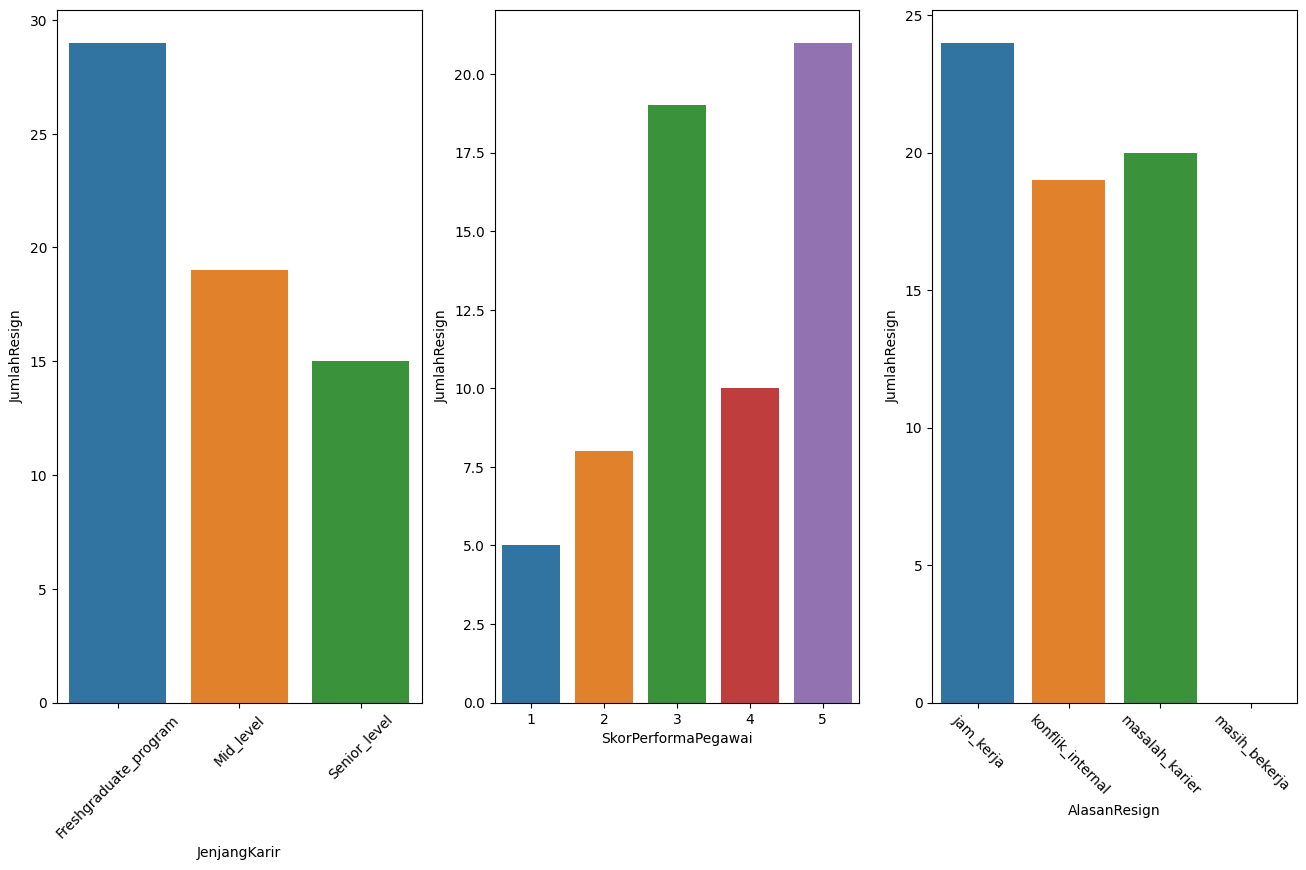

In [239]:
jenjang_karir_se = se_resign_data[['JenjangKarir', 'Resigned']].groupby('JenjangKarir').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
skor_performa_se = se_resign_data[['SkorPerformaPegawai', 'Resigned']].groupby('SkorPerformaPegawai').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
alasan_resign_se = se_resign_data[['AlasanResign', 'Resigned']].groupby('AlasanResign').agg({'Resigned':'count'}).reset_index().rename(columns={'Resigned':'JumlahResign'})
     
plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 1)
sns.barplot (data=jenjang_karir_se, x='JenjangKarir', y='JumlahResign')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot (data=skor_performa_se, x='SkorPerformaPegawai', y='JumlahResign')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.barplot (data=alasan_resign_se, x='AlasanResign', y='JumlahResign')
plt.xticks(rotation=-45)

🔎 Insights
- 29 dari 63 karyawan yang _resign_ adalah _fresh graduate_.
- 24 di antaranya _resign_ dengan alasan jam kerja.
- Rata-rata `SkorPerformaPegawai` 3,5 atau bagus.

🔽 `Data Analyst vs. Software Engineering`

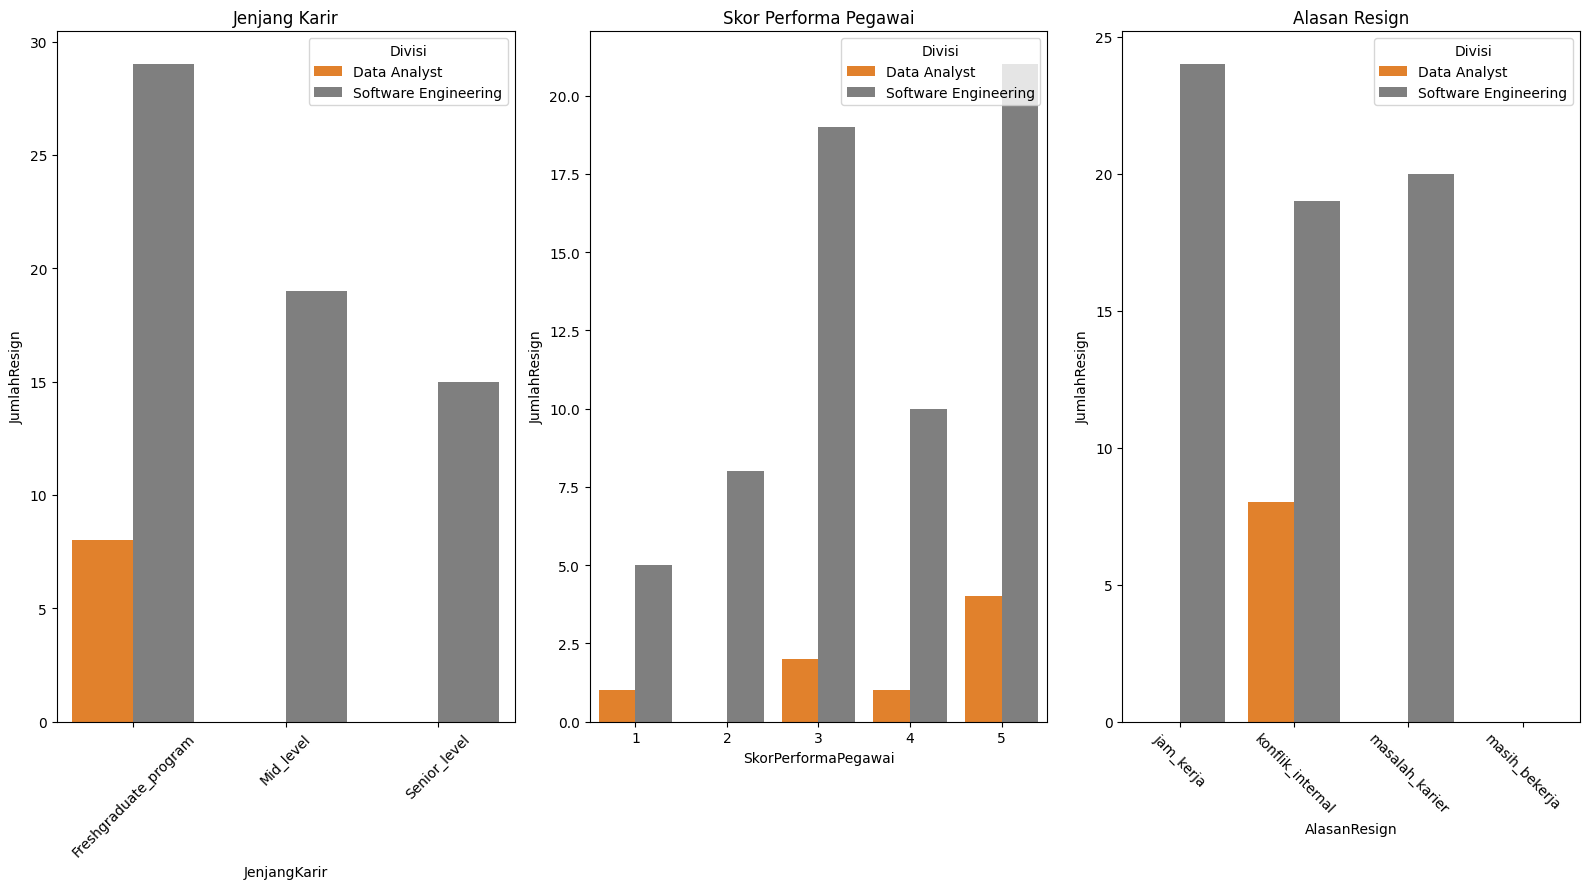

In [240]:
plt.figure(figsize=(16, 9))

# Plot JenjangKarir
plt.subplot(1, 3, 1)
sns.barplot(data=pd.concat([jenjang_karir_da.assign(Divisi='Data Analyst'), jenjang_karir_se.assign(Divisi='Software Engineering')]), x='JenjangKarir', y='JumlahResign', hue='Divisi', palette=['tab:orange', 'tab:gray'])
plt.xticks(rotation=45)
plt.title('Jenjang Karir')

# Plot SkorPerformaPegawai
plt.subplot(1, 3, 2)
sns.barplot(data=pd.concat([skor_performa_da.assign(Divisi='Data Analyst'), skor_performa_se.assign(Divisi='Software Engineering')]), x='SkorPerformaPegawai', y='JumlahResign', hue='Divisi', palette=['tab:orange', 'tab:gray'])
plt.xticks(rotation=0)
plt.title('Skor Performa Pegawai')

# Plot AlasanResign
plt.subplot(1, 3, 3)
sns.barplot(data=pd.concat([alasan_resign_da.assign(Divisi='Data Analyst'), alasan_resign_se.assign(Divisi='Software Engineering')]), x='AlasanResign', y='JumlahResign', hue='Divisi', palette=['tab:orange', 'tab:gray'])
plt.xticks(rotation=-45)
plt.title('Alasan Resign')

plt.tight_layout()
plt.show()

#### Recomendation

Berikut ini beberapa strategi untuk meningkatkan nilai employee retention.
- Membangun budaya perusahaan yang positif, inklusif, dan menyenangkan dapat membantu menciptakan lingkungan kerja yang memotivasi dan memperkuat loyalitas karyawan.
- Menyediakan peluang pengembangan karier dan pelatihan bagi karyawan dapat meningkatkan keterlibatan serta kesempatan untuk tumbuh.
- Menyediakan fleksibilitas dalam jam kerja, seperti **work from anywhere** (WFA) atau pola kerja yang menawarkan **work-life balance** dapat membantu menjaga kepuasan karyawan.


### Resignation Behavior Prediction

In [241]:
# Check missing values
nan_cols = df_eng.isna().any()
df_eng.isna().sum()[nan_cols]

TanggalResign    198
TahunResign      198
dtype: int64

In [242]:
# Check duplicate values
df_eng.duplicated().sum()

0

In [243]:
# Define features
num = df_eng.select_dtypes(include=['int64', 'Int64'])
cat = df_eng.select_dtypes(include=['category'])

num_cols = num.columns
cat_cols = cat.columns

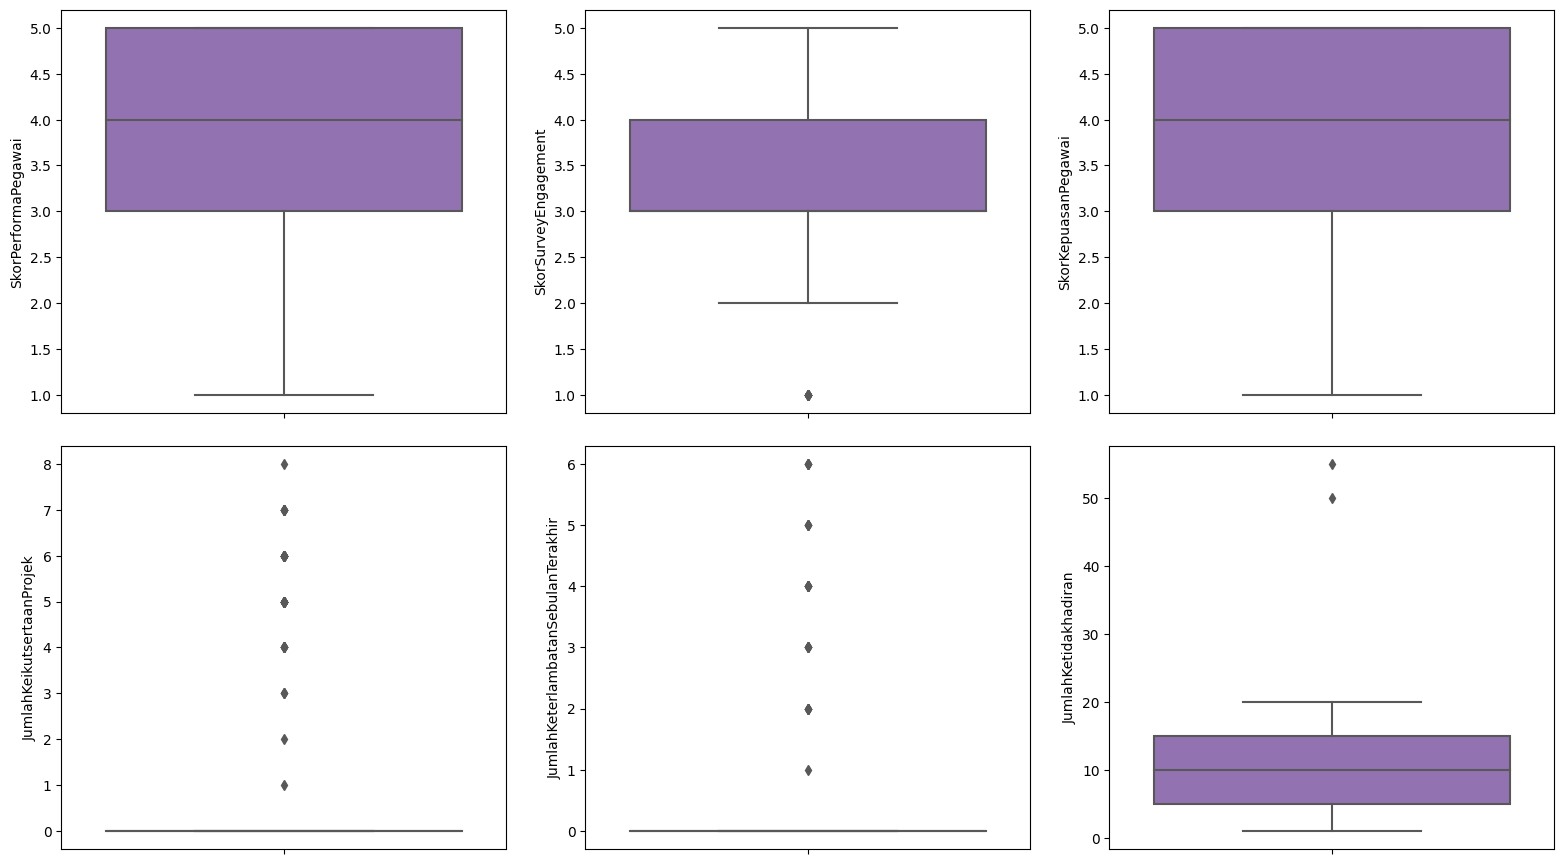

In [244]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols) - 3):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[num_cols[i]], color='tab:purple')
    plt.tight_layout(pad=2)

In [245]:
df_eng[df_eng['JumlahKetidakhadiran'] > 20]

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,SkorPerformaPegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Resigned,TahunHiring,TahunResign
12,Menikah,Pria,FullTime,Software Engineer,Freshgraduate_program,3,Jakarta Pusat,LinkedIn,4,3,0,0,50,S2,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,NaT,0,2013,<NA>
115,Belum_menikah,Wanita,FullTime,Software Engineer,Mid_level,3,Jakarta Pusat,Google_Search,4,5,0,0,55,S1,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,NaT,0,2011,<NA>


In [246]:
# Drop outliers
df_eng = df_eng.drop(df_eng[df_eng['JumlahKetidakhadiran'] > 20].index)

🔽 `Usia`

In [247]:
from datetime import datetime

df_eng['Umur'] = datetime.now().year - df_eng['TanggalLahir'].dt.year
df_eng['Umur'] = df_eng['Umur'].astype('int32')

🔽 `LamaBekerja`

In [248]:
df_eng['LamaBekerja'] = (datetime.now().year) - (df_eng['TanggalHiring'].dt.year)
df_eng['LamaBekerja'] = df_eng['LamaBekerja'].fillna((df_eng['TanggalResign'].dt.year) - (df_eng['TanggalHiring'].dt.year))
df_eng['LamaBekerja'] = df_eng['LamaBekerja'].astype('int32')

In [249]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    category      
 1   JenisKelamin                        285 non-null    category      
 2   StatusKepegawaian                   285 non-null    category      
 3   Pekerjaan                           285 non-null    category      
 4   JenjangKarir                        285 non-null    category      
 5   SkorPerformaPegawai                 285 non-null    int64         
 6   AsalDaerah                          285 non-null    category      
 7   HiringPlatform                      285 non-null    category      
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    int64         
 10  JumlahKeikutsertaanProjek      

## Feature Encoding

In [250]:
df_enc = df_eng.copy()

In [251]:
df_enc['JenisKelamin'] = df_enc['JenisKelamin'].replace({'Wanita': 0, 'Pria': 1}).astype('int32')
df_enc['JenjangKarir'] = df_enc['JenjangKarir'].replace({'Freshgraduate_program': 1,
                                                         'Mid_level'            : 2,
                                                         'Senior_level'         : 3}).astype('int32')
df_enc['TingkatPendidikan'] = df_enc['TingkatPendidikan'].replace({'S1': 1, 'S2': 2, 'S3': 3}).astype('int32')


In [252]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_enc['StatusPernikahan'] = encoder.fit_transform(df_enc['StatusPernikahan'])
df_enc['StatusKepegawaian'] = encoder.fit_transform(df_enc['StatusKepegawaian'])
df_enc['Pekerjaan'] = encoder.fit_transform(df_enc['Pekerjaan'])
df_enc['AsalDaerah'] = encoder.fit_transform(df_enc['AsalDaerah'])
df_enc['HiringPlatform'] = encoder.fit_transform(df_enc['HiringPlatform'])
df_enc['AlasanResign'] = encoder.fit_transform(df_enc['AlasanResign'])

## Feature Selection

In [253]:
df_sel = df_enc.copy()
df_sel = df_sel.drop(columns=['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'TahunHiring', 'TahunResign'])
df_sel = df_sel.astype('int32')

In [254]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   StatusPernikahan                    285 non-null    int32
 1   JenisKelamin                        285 non-null    int32
 2   StatusKepegawaian                   285 non-null    int32
 3   Pekerjaan                           285 non-null    int32
 4   JenjangKarir                        285 non-null    int32
 5   SkorPerformaPegawai                 285 non-null    int32
 6   AsalDaerah                          285 non-null    int32
 7   HiringPlatform                      285 non-null    int32
 8   SkorSurveyEngagement                285 non-null    int32
 9   SkorKepuasanPegawai                 285 non-null    int32
 10  JumlahKeikutsertaanProjek           285 non-null    int32
 11  JumlahKeterlambatanSebulanTerakhir  285 non-null    int32
 12  JumlahKetidak

In [255]:
corr = df_sel.corr(method='spearman')['Resigned'].sort_values()

# Display correlations
print(f'Positive Correlations:\n{corr.tail(9)}')
print(f'\nNegative Correlations:\n{corr.head(9)}')

Positive Correlations:
JenisKelamin                0.01
StatusPernikahan            0.02
JumlahKetidakhadiran        0.02
JenjangKarir                0.04
SkorPerformaPegawai         0.04
JumlahKeikutsertaanProjek   0.06
TingkatPendidikan           0.08
AsalDaerah                  0.09
Resigned                    1.00
Name: Resigned, dtype: float64

Negative Correlations:
AlasanResign                         -0.98
HiringPlatform                       -0.12
Umur                                 -0.11
SkorKepuasanPegawai                  -0.06
StatusKepegawaian                    -0.04
SkorSurveyEngagement                 -0.01
LamaBekerja                           0.00
Pekerjaan                             0.00
JumlahKeterlambatanSebulanTerakhir    0.01
Name: Resigned, dtype: float64


🔎 Observasi
- Oleh karena fitur `AlasanResign` diperoleh setelah proses _resign_ terjadi, maka fitur ini tidak dapat digunakan sebagai fitur prediksi.

In [256]:
# Drop column
df_sel.drop(columns=['AlasanResign'], inplace=True)

# Data Modeling

In [257]:
df_model = df_sel.copy()

In [258]:
# Define X (features) and y (target)
X = df_model.drop(columns='Resigned').copy()
y = df_model['Resigned'].copy()

print(X.shape)
print(y.shape)

(285, 16)
(285,)


## Train Test Splitting

In [259]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print('Split 80:20')
print('Total baris dan kolom dari X train set:', X_train.shape)
print('Total baris dan kolom dari X test set :', X_test.shape)

Split 80:20
Total baris dan kolom dari X train set: (228, 16)
Total baris dan kolom dari X test set : (57, 16)


In [260]:
y_train.value_counts()

Resigned
0    156
1     72
Name: count, dtype: int64

🔎 Observasi
- Oleh karena fitur target _imbalance_, maka akan dilakukan _over-sampling_ menggunakan _Synthetic Minority Over-sampling Technique_ (SMOTE).

## SMOTE

In [261]:
# pip install imblearn

In [262]:
from imblearn.over_sampling import SMOTE

X_train_smote, y_train_smote = SMOTE(random_state=100).fit_resample(X_train, y_train)

In [263]:
y_train_smote.value_counts()

Resigned
0    156
1    156
Name: count, dtype: int64

🔎 Observasi
- Fitur target _balance_ setelah diterapkan SMOTE.

## Feature Scaling: Normalization

In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.fit_transform(X_test)

## Determine Models with `LazyPredict` Library

Referensi: https://github.com/shankarpandala/lazypredict/

In [265]:
# pip install lazypredict

In [266]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(f'Top 5 Models\n{models.head()}')

100%|██████████| 29/29 [00:17<00:00,  1.65it/s]

Top 5 Models
                            Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                        
DecisionTreeClassifier          0.72               0.68     0.68      0.72  \
LGBMClassifier                  0.74               0.64     0.64      0.72   
XGBClassifier                   0.67               0.58     0.58      0.66   
LinearDiscriminantAnalysis      0.74               0.56     0.56      0.65   
RidgeClassifierCV               0.74               0.56     0.56      0.65   

                            Time Taken  
Model                                   
DecisionTreeClassifier            0.02  
LGBMClassifier                    0.20  
XGBClassifier                     2.28  
LinearDiscriminantAnalysis        1.01  
RidgeClassifierCV                 0.03  


🔎 Observasi
- Kami akan menggunakan hasil dari `lazypredict` sebagai ***baseline models***, yang membantu kami memahami model mana yang berfungsi lebih baik tanpa penyetelan parameter apa pun.
- Dataset yang digunakan pada `lazypredict` tersebut adalah dataset sebelum diterapkan _over-sampling_ dan _scaling_.
- Dari Top 5 Models, model algoritma yang memiliki nilai akurasi tertinggi adalah `DecisionTreeClassifier`, `LGBMClassifier`, `XGBClassifier`, `LinearDiscriminantAnalysis`, dan `RidgeClassifierCV`.

## Define Functions

In [267]:
# Define create_model() function
def create_model(X_train, X_test, y_train, y_test, models):
    performance = []
    for i in models:
        model = i
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        train_accuracy, test_accuracy = accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)
        train_precision, test_precision = precision_score(y_train, y_pred_train, pos_label=0), precision_score(y_test, y_pred, pos_label=0)
        train_recall, test_recall = recall_score(y_train, y_pred_train, pos_label=0), recall_score(y_test, y_pred, pos_label=0)
        train_f1, test_f1 = f1_score(y_train, y_pred_train, pos_label=0), f1_score(y_test, y_pred, pos_label=0)
        train_f2, test_f2 = fbeta_score(y_train, y_pred_train, pos_label=0, beta=2), fbeta_score(y_test, y_pred, pos_label=0, beta=2)
        performance.append([train_accuracy, test_accuracy,
                            train_precision, test_precision,
                            train_recall, test_recall,
                            train_f1, test_f1,
                            train_f2, test_f2])
    
    performance_df = pd.DataFrame(data=performance, 
                                  columns='Train\nAccuracy, Test\nAccuracy, Train\nPrecision, Test\nPrecision, Train\nRecall, Test\nRecall, Train\nF1 Score, Test\nF1 Score, Train\nF2 Score, Test\nF2 Score'.split(','),
                                  index=[str(model).split('(')[0] for model in models])
    
    plt.figure(figsize=(16, 9))
    sns.heatmap(performance_df, cmap='mako', annot=True, annot_kws={'fontsize' : 12})
    plt.tick_params(axis='both',
                    which='major',
                    labelsize=12,
                    labelbottom=False, bottom=False,
                    labeltop=True, top=False)
    plt.tight_layout()
    plt.show()

# Define c_matrix_plot() function
def c_matrix_plot(y_test, y_pred):

    c_matrix = confusion_matrix(y_test, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='mako')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['Not Resign', 'Resigned'])
    ax.yaxis.set_ticklabels(['Not Resign', 'Resigned'])
    plt.show()

# Define model_evaluation() function
def model_evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Train): %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train): %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train): %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train): %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test): %.2f' % f1_score(y_test, y_pred))

    print('F2-Score (Train): %.2f' % fbeta_score(y_train, y_pred_train, beta=2))
    print('F2-Score (Test): %.2f' % fbeta_score(y_test, y_pred, beta=2))
    
    print('ROC-AUC Score (Train-Probability): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC Score (Test-Probability): %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Define train_test_result() function
def train_test_result(y_train, y_pred_train, y_test, y_pred):
    # Evaluate model on training set
    print('TRAINING RESULTS:')
    print('-------------------------------------------------------')    
    print('Classification Report:')
    print(classification_report(y_train, y_pred_train))
    print('-------------------------------------------------------')
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred_train))
    print('-------------------------------------------------------')

    # Evaluate model on test set
    print('\nTESTING RESULTS:')
    print('-------------------------------------------------------')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-------------------------------------------------------')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('-------------------------------------------------------')

# Define show_best_parameter() function
def show_best_parameter(model):
    print(model.best_estimator_.get_params())

In [268]:
X_train, X_test, y_train, y_test = X_train_scaled, X_test_scaled, y_train_smote, y_test

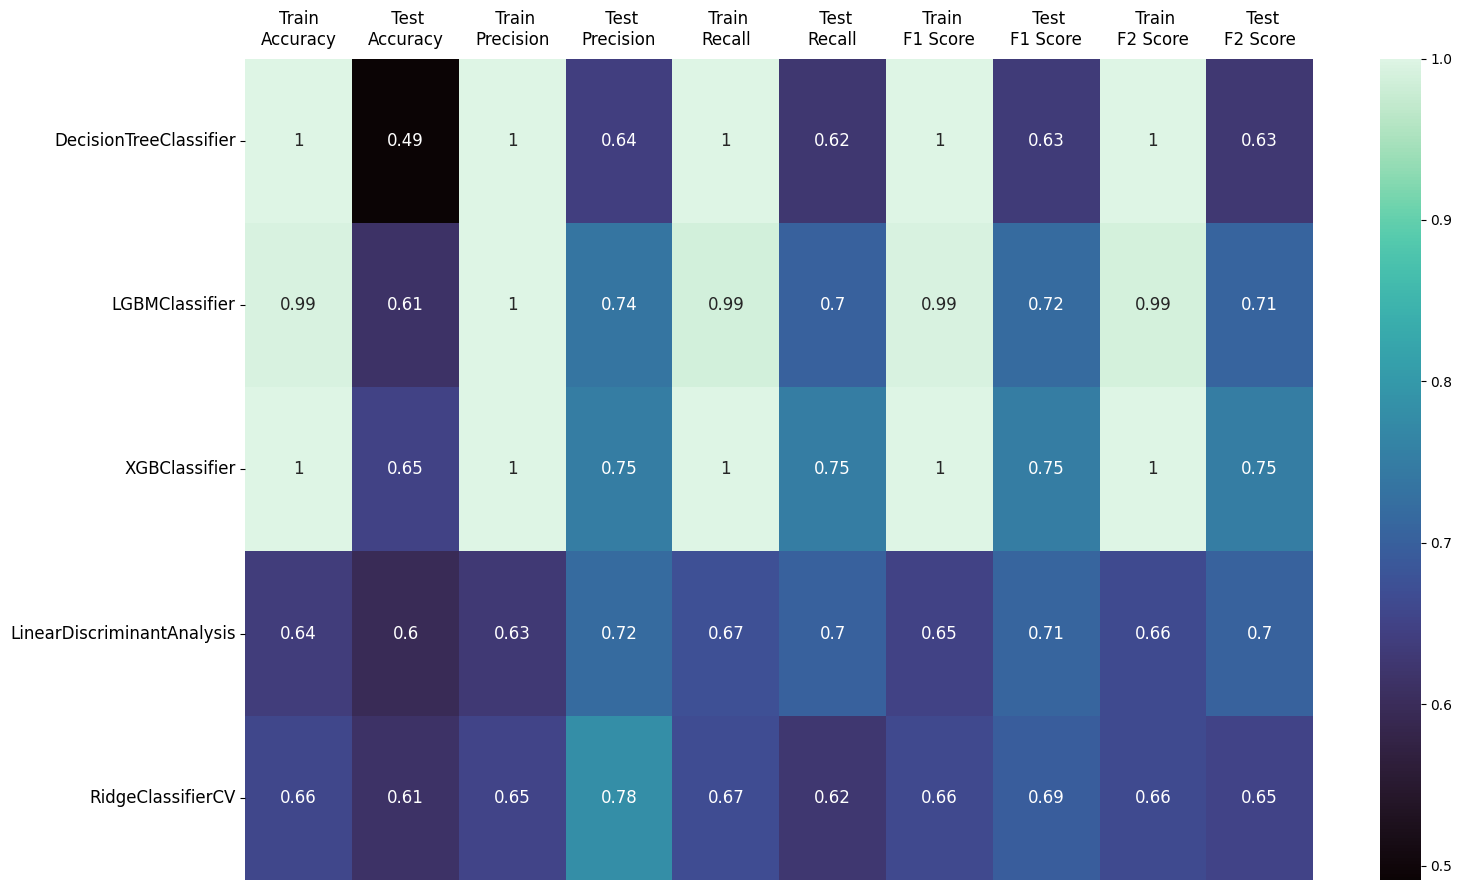

In [269]:
# Define Classification Algorithm
models = [
    DecisionTreeClassifier(),
    LGBMClassifier(),
    XGBClassifier(),
    LinearDiscriminantAnalysis(),
    RidgeClassifierCV()
]

# Create model
create_model(X_train, X_test, y_train, y_test, models)

🔎 Insights
- Pada tahap ini, metrik evaluasi yang digunakan sebagai pertimbangan untuk memilih model: _accuracy_, yaitu metrik yang mengukur sejauh mana model dapat memprediksi dengan benar. Makin tinggi akurasi, makin baik performa model.
- Berdasarkan hasil evaluasi model, 3 model teratas dengan hasil yang relatif sama adalah `DecisionTreeClassifier`, `LGBMClassifier`, dan `XGBClassifier`. Namun, ketiganya cenderung _over-fitting_, sehingga perlu dilakukan _hyperparameter tuning_.

## Hyperparameter Tuning

In [270]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [271]:
# DecisionTreeClassifier
pipeline1 = make_pipeline(DecisionTreeClassifier())
cv_scores1 = cross_val_score(pipeline1, X, y, cv=5, scoring='accuracy')
print('Cross-validation accuracy (DecisionTreeClassifier):', cv_scores1.mean().round(4))

# LGBMClassifier
pipeline2 = make_pipeline(LGBMClassifier())
cv_scores2 = cross_val_score(pipeline2, X, y, cv=5, scoring='accuracy')
print('Cross-validation accuracy (LGBMClassifier)        :', cv_scores2.mean().round(4))

# XGBClassifier
pipeline3 = make_pipeline(XGBClassifier())
cv_scores3 = cross_val_score(pipeline3, X, y, cv=5, scoring='accuracy')
print('Cross-validation accuracy (XGBClassifier)         :', cv_scores3.mean().round(4))

Cross-validation accuracy (DecisionTreeClassifier): 0.5614
Cross-validation accuracy (LGBMClassifier)        : 0.6702
Cross-validation accuracy (XGBClassifier)         : 0.6491


In [272]:
# DecisionTreeClassifier
pipeline1 = make_pipeline(DecisionTreeClassifier())
param_grid1 = {
    'decisiontreeclassifier__max_depth': [None, 5, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
grid1 = GridSearchCV(pipeline1, param_grid1, cv=5, scoring='accuracy')
grid1.fit(X, y)
print('Best parameters (DecisionTreeClassifier)               :', grid1.best_params_)
print('Best cross-validation accuracy (DecisionTreeClassifier):', grid1.best_score_.round(3))

# LGBMClassifier
pipeline2 = make_pipeline(LGBMClassifier())
param_grid2 = {
    'lgbmclassifier__max_depth': [None, 5, 10],
    'lgbmclassifier__learning_rate': [0.1, 0.01, 0.001],
    'lgbmclassifier__n_estimators': [100, 200, 500]
}
grid2 = GridSearchCV(pipeline2, param_grid2, cv=5, scoring='accuracy')
grid2.fit(X, y)
print('\nBest parameters (LGBMClassifier)                       :', grid2.best_params_)
print('Best cross-validation accuracy (LGBMClassifier)        :', grid2.best_score_.round(3))

# XGBClassifier
pipeline3 = make_pipeline(XGBClassifier())
param_grid3 = {
    'xgbclassifier__max_depth': [3, 5, 10],
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.001],
    'xgbclassifier__n_estimators': [100, 200, 500]
}
grid3 = GridSearchCV(pipeline3, param_grid3, cv=5, scoring='accuracy')
grid3.fit(X, y)
print('\nBest parameters (XGBClassifier)                        :', grid3.best_params_)
print('Best cross-validation accuracy (XGBClassifier)         :', grid3.best_score_.round(3))

Best parameters (DecisionTreeClassifier)               : {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best cross-validation accuracy (DecisionTreeClassifier): 0.635

Best parameters (LGBMClassifier)                       : {'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__max_depth': None, 'lgbmclassifier__n_estimators': 100}
Best cross-validation accuracy (LGBMClassifier)        : 0.691

Best parameters (XGBClassifier)                        : {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 200}
Best cross-validation accuracy (XGBClassifier)         : 0.684


#### `LGBMClassifier`

In [273]:
# Hyperparameter Tuning
hyperparameters = {
    'max_depth': [None, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500]
}

rs_lgbm = LGBMClassifier(random_state=100)
rs_lgbm = RandomizedSearchCV(rs_lgbm, hyperparameters, scoring='accuracy', random_state=100, cv=StratifiedKFold(n_splits=5), n_iter=50)
rs_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(random_state=100), n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=100, scoring='accuracy')

In [274]:
# Predict & Evaluation
model_evaluation(rs_lgbm)

Accuracy (Train): 1.00
Accuracy (Test): 0.68
Precision (Train): 1.00
Precision (Test): 0.47
Recall (Train): 1.00
Recall (Test): 0.47
F1-Score (Train): 1.00
F1-Score (Test): 0.47
F2-Score (Train): 1.00
F2-Score (Test): 0.47
ROC-AUC Score (Train-Probability): 1.00
ROC-AUC Score (Test-Probability): 0.62


In [275]:
# Best parameter
show_best_parameter(rs_lgbm)

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


#### Classification Report

In [276]:
# Prediction on training set
y_pred_train = rs_lgbm.predict(X_train)
# Prediction on testing set
y_pred = rs_lgbm.predict(X_test)

# Evaluate model
train_test_result(y_train, y_pred_train, y_test, y_pred)

TRAINING RESULTS:
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       156

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312

-------------------------------------------------------
Confusion Matrix:
[[156   0]
 [  0 156]]
-------------------------------------------------------

TESTING RESULTS:
-------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.47      0.47      0.47        17

    accuracy                           0.68        57
   macro avg       0.62      0.62      0.62        57
weighted avg       0.68      0.68      0.68        57


#### Confusion Matrix

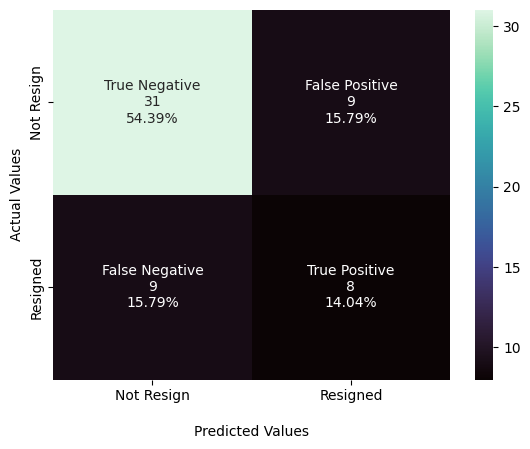

In [277]:
y_pred = rs_lgbm.predict(X_test)
c_matrix_plot(y_test, y_pred)

🔎 Insights
- Terdapat 8 prediksi benar yang diklasifikasikan sebagai _resign_ (True Positive, TP).
- Terdapat 9 prediksi salah yang diklasifikasikan sebagai _resign_ padahal tidak (False Positive, FP).
- Terdapat 9 prediksi salah yang diklasifikasikan sebagai tidak _resign_ padahal iya (False Negative, FN).
- Terdapat 31 prediksi benar yang diklasifikasikan sebagai tidak _resign_ (True Negative, TN).

#### Learning Curve

In [278]:
# Define plot_learning_curve() function
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(16, 9))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='tab:blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='tab:orange')
    plt.plot(train_sizes, train_mean, 'o-', color='tab:blue', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='tab:orange', label='Validation Accuracy')
    
    plt.legend(loc='best')
    plt.show()

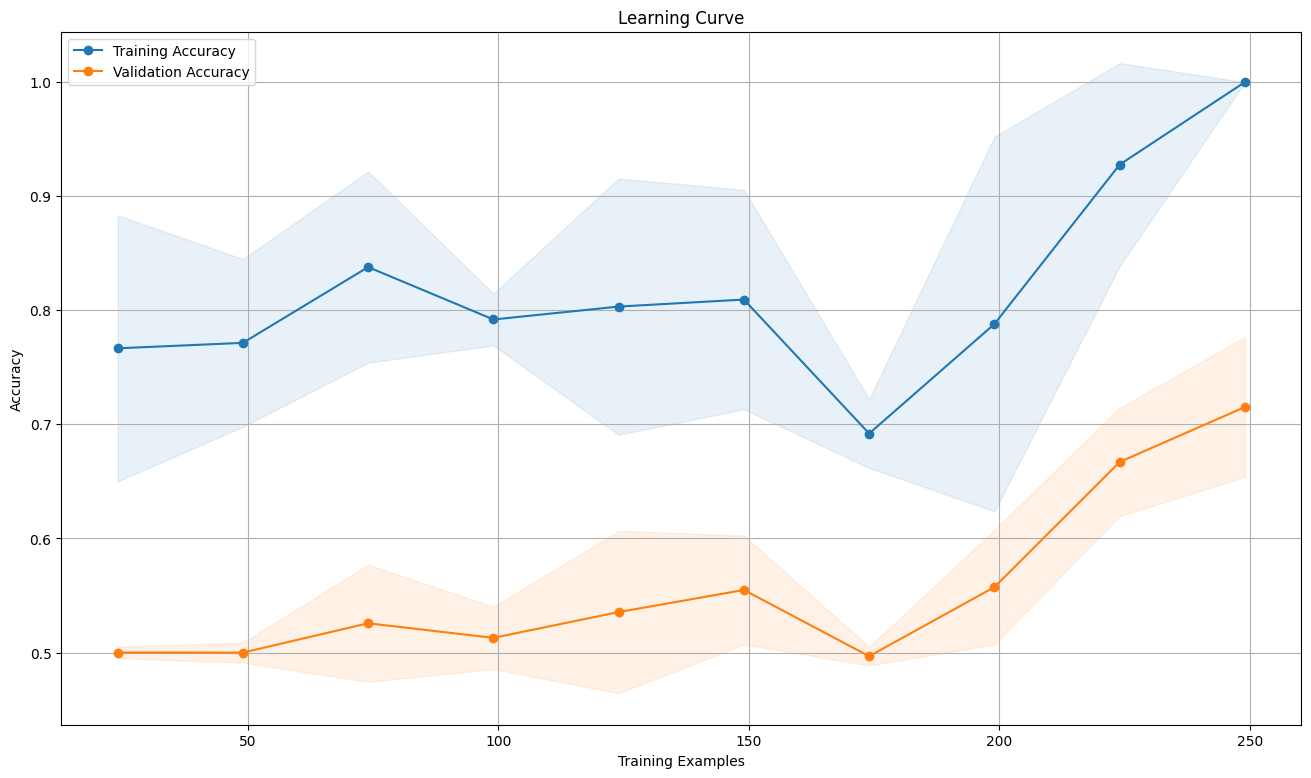

In [279]:
plot_learning_curve(rs_lgbm, X_train, y_train)

#### Feature Importance

In [280]:
# Define show_feature_importance() function
def show_feature_importance(model, feature_names, n_features=16):
    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    ax = feat_importances.nlargest(n_features).plot(kind='barh', title='Feature Importance', figsize=(16, 9))
    ax.invert_yaxis()

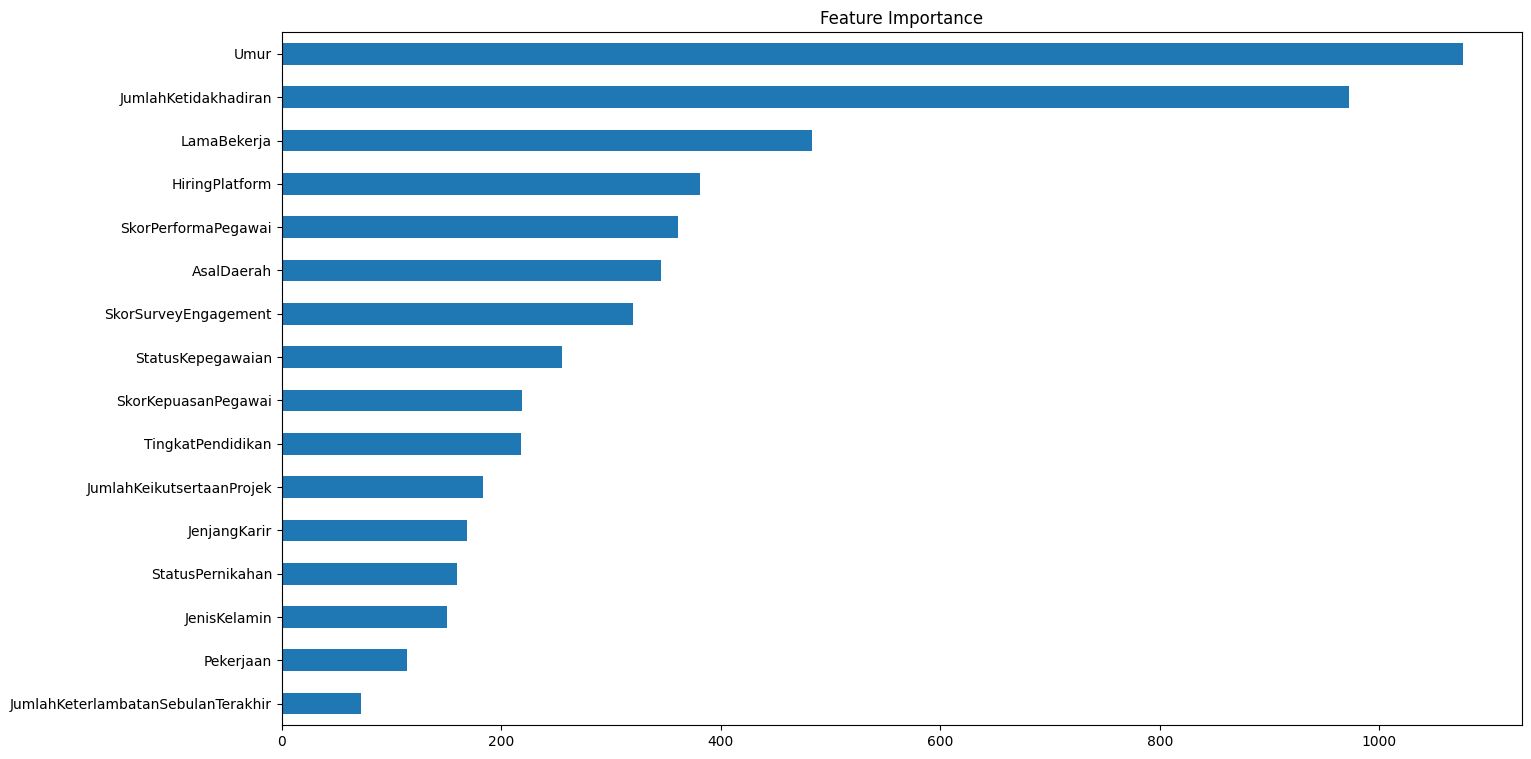

In [281]:
show_feature_importance(rs_lgbm.best_estimator_, X.columns)

🔎 Insights
- Berikut ini 5 _feature importance_.
    - `Umur`,
    - `JumlahKetidakhadiran`,
    - `LamaBekerja`,
    - `HiringPlatform`, dan
    - `SkorPerformaPegawai`.
- Fitur `Umur` berkorelasi positif yang lebih kuat dibandingkan dengan fitur yang lain. Artinya, makin tua umur pengguna, makin besar kecenderungan untuk _resign_.

## Interpretation and Explanation

In [282]:
lgbm = rs_lgbm
lgbm

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(random_state=100), n_iter=50,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=100, scoring='accuracy')

### Confusion Matrix

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        40
           1       0.47      0.47      0.47        17

    accuracy                           0.68        57
   macro avg       0.62      0.62      0.62        57
weighted avg       0.68      0.68      0.68        57



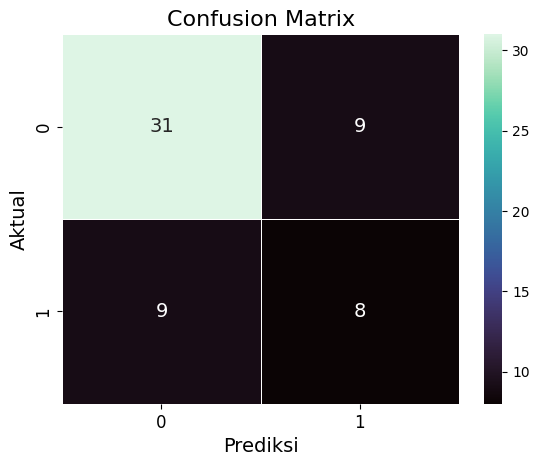

In [283]:
pred_y = lgbm.predict(X_test)

# Confusion Matrix Test
cm = confusion_matrix(y_test, pred_y)
print(classification_report(y_test, pred_y))

sns.heatmap(cm, cmap='mako', annot=True, linewidth=0.5, fmt='d', annot_kws={'size': 14})
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Prediksi',fontsize=14)
plt.ylabel('Aktual', fontsize=14)
plt.show()

In [284]:
# Define confusion_matrix_table() function
def confusion_matrix_table(y, pred):
    cm = confusion_matrix(y, pred)
    tn, fp, fn, tp = cm.ravel()
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (fn + tp)
    tpr = tp / (fn + tp)
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.1%})',
                          f'FP = {fp} (FPR = {fpr:1.1%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.1%})', 
                          f'TP = {tp} (TPR = {tpr:1.1%})']],
                        index=['True 0', 'True 1'], 
                        columns=['Pred 0', 'Pred 1'])

In [285]:
confusion_matrix_table(y_test, pred_y)

,Pred 0,Pred 1
True 0,TN = 31 (TNR = 77.5%),FP = 9 (FPR = 22.5%)
True 1,FN = 9 (FNR = 52.9%),TP = 8 (TPR = 47.1%)


### Threshold Curve

In [286]:
pred_y = lgbm.predict(X_test)
pred_train_y = lgbm.predict(X_train)
pred_proba_test_y = lgbm.predict_proba(X_test)
pred_proba_train_y = lgbm.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_test, pred_proba_test_y[:, 1])
thresholds

array([1.99995807e+00, 9.99958072e-01, 9.70731311e-01, 8.95142367e-01,
       8.88490387e-01, 8.79255454e-01, 7.88374869e-01, 6.36088774e-01,
       2.82938856e-01, 2.82035080e-01, 8.40286496e-02, 7.71102629e-02,
       6.32191593e-02, 3.92644533e-02, 9.09731152e-03, 7.65156108e-03,
       2.16073732e-03, 2.02557733e-03, 8.55349067e-06])

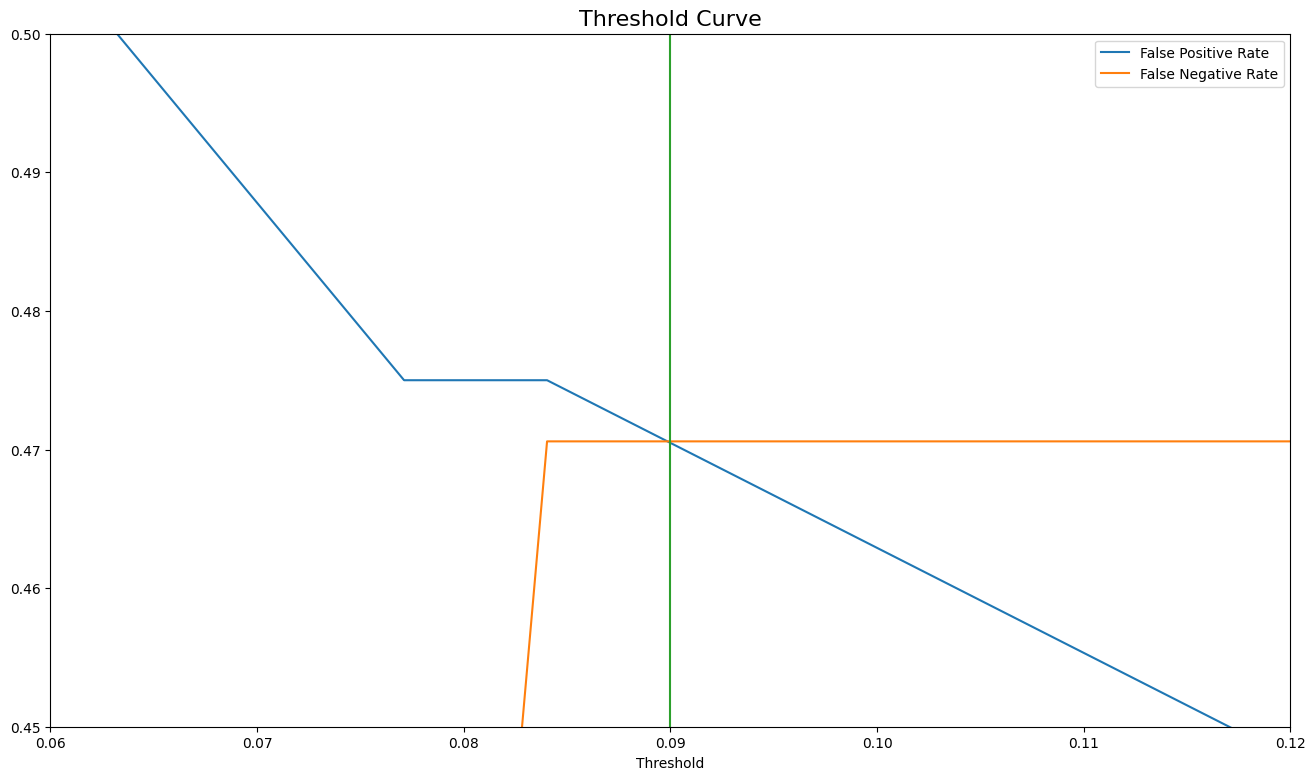

In [287]:
df_plot = pd.DataFrame({'Threshold':thresholds, 'False Positive Rate':fpr, 'False Negative Rate':1.-tpr})
ax = df_plot.plot(x='Threshold', y=['False Positive Rate', 'False Negative Rate'], figsize=(16, 9))
ax.plot([0.09, 0.09], [0, 0.5])                     # Mark example thresh
ax.set_xbound(0.06, 0.12); ax.set_ybound(0.45, 0.5) # Zoom
plt.title('Threshold Curve', fontsize=16)
plt.show()

🔎 Insights
- _Threshold curve_ menggambarkan variasi threshold yang digunakan untuk memprediksi kelas positif dan kelas negatif.
- Makin kecil nilai threshold, makin besar kemungkinan sampel diklasifikasikan sebagai kelas positif.
- Pada nilai threshold yang lebih besar, kemungkinan sampel diklasifikasikan sebagai kelas negatif meningkat.

### Area Under the Receiver Operating Characteristic Curve (ROC AUC)

In [288]:
roc_auc_value = roc_auc_score(y_test, pred_proba_test_y[:,1]).round(4)
gini_value = ((2 * roc_auc_value)-1).round(4)

print('AUC for LGBMClassifier on data test :', round(roc_auc_value * 100, 2), '%')
print('Gini for LGBMClassifier on data test:', round(gini_value * 100, 2), '%')

AUC for LGBMClassifier on data test : 61.91 %
Gini for LGBMClassifier on data test: 23.82 %


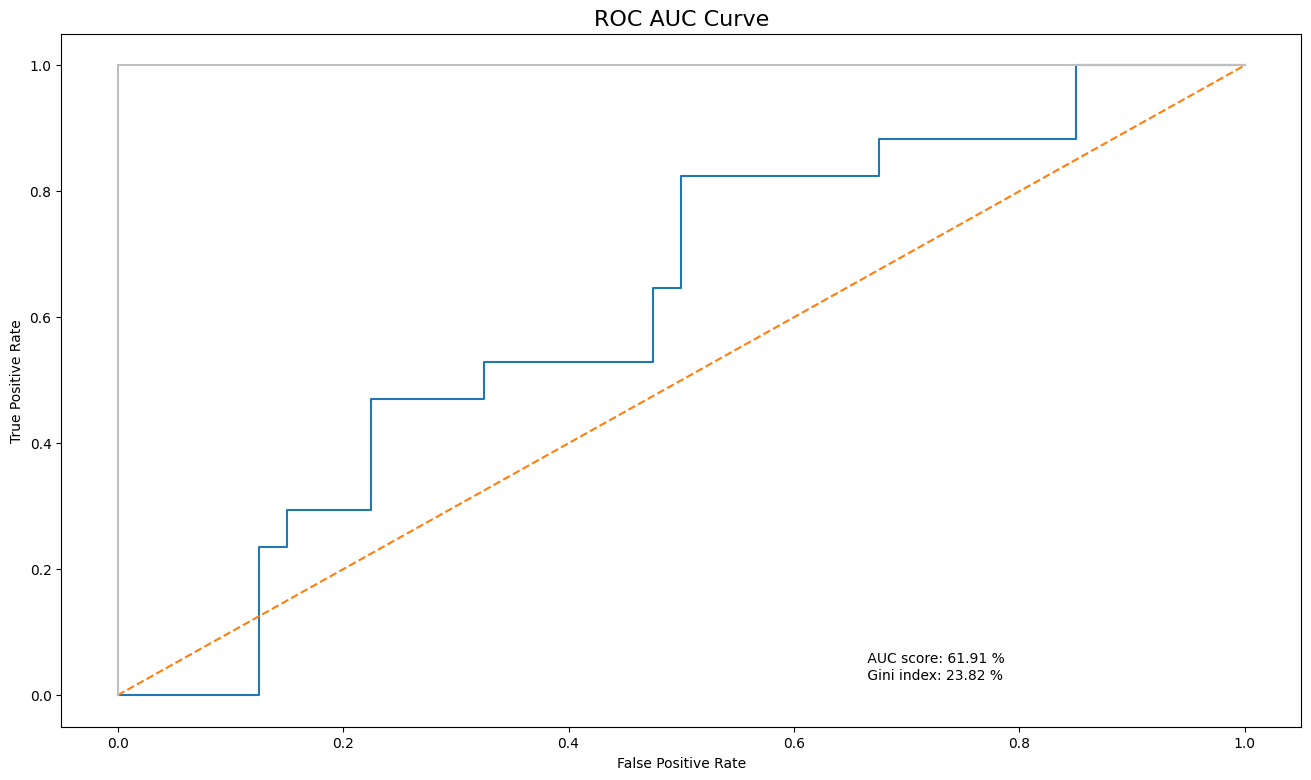

In [289]:
fig, ax = plt.subplots(1, figsize=(16, 9))
plt.title('ROC AUC Curve', fontsize=16)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0] , c='.75'), plt.plot([1, 1] , c='.75')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.text(ax.get_xlim()[1]*6/10, 
         0,
         f"""\n
         AUC score: {round(roc_auc_value * 100, 2)} %
         Gini index: {round(gini_value * 100, 2)} %
         """)

plt.show()

🔎 Insights
- _Area Under Curve_ (AUC) adalah metrik evaluasi yang digunakan untuk mengukur performa model klasifikasi. Nilai AUC berada dalam rentang 0 hingga 1, nilai yang lebih tinggi menunjukkan performa yang lebih baik.
- Nilai AUC sebesar 61,91% menunjukkan bahwa model `LGBMClassifier` memiliki tingkat performa yang cukup baik dalam membedakan antara kelas positif dan kelas negatif pada data test.
- Nilai Gini sebesar 23,82% menunjukkan bahwa tingkat kesetaraan yang relatif rendah dalam pemisahan antara kelas positif dan kelas negatif pada data test.